# 🎓 Mémoire de Fin d’Études  
## Master Innovation, Marchés et Science des Données (IMSD)  
### Université d'Évry (Paris Saclay)

---

## 🧠 Modélisation prédictive des sinistres  et optimisation des décisions de souscription en assurance

*Une double approche par classification et régression sur données synthétiques*

---

### 👨‍💻 Réalisé par :  
**Mamadou DIEDHIOU**, 
Alternant Chargé d’études statistiques – AXA Prévoyance & Patrimoine

### 👨‍🏫 Encadré par :  
**[Nom de ton encadrant académique]**  
**[Nom du second encadrant ou tuteur entreprise, si applicable]**

---

### 📅 Année universitaire :  
2024 – 2025

### 📍 Lieu :  
Paris, France


* **Chargement des bibliothèques**

In [1]:
!pip install statsmodels



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



* **Importation des données**

In [42]:
df1 = pd.read_csv("C:/Users/mdied/OneDrive/Bureau/M2 IMSD/Memoire/data/insurance_dataset.csv")
df2 = pd.read_csv("C:/Users/mdied/OneDrive/Bureau/M2 IMSD/Memoire/data/data_synthetic.csv")

In [4]:
df1

,Age,Gender,Income,Marital_Status,Education,Occupation,Claim_Amount
0,79.0,Female,248970.000000,Single,Bachelor's,CEO,7955.0
1,32.0,Male,80450.000000,Single,Bachelor's,CEO,7634.0
2,33.0,Female,286673.000000,Single,Bachelor's,Engineer,2116.0
3,52.0,Female,285679.000000,Married,PhD,Waiter,4882.0
4,61.0,Female,105204.000000,Single,Master's,CEO,9431.0
...,...,...,...,...,...,...,...
12995,55.0,Female,404427.908255,Single,PhD,Teacher,20406.0
12996,22.0,Male,180324.000000,Single,Master's,CEO,63320.0
12997,75.0,Female,255602.000000,Single,Bachelor's,Engineer,664.0
12998,44.0,Male,110094.000000,Single,Master's,CEO,7550.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             13000 non-null  float64
 1   Gender          13000 non-null  object 
 2   Income          13000 non-null  float64
 3   Marital_Status  13000 non-null  object 
 4   Education       13000 non-null  object 
 5   Occupation      13000 non-null  object 
 6   Claim_Amount    13000 non-null  float64
dtypes: float64(3), object(4)
memory usage: 711.1+ KB


### 2 - Analyse Exploratoire des Données

In [6]:
df1.describe()

,Age,Income,Claim_Amount
count,13000.000000,13000.000000,13000.000000
mean,51.646209,146501.578731,15557.675308
std,20.578780,105242.201769,23521.366737
min,18.000000,5409.000000,123.000000
25%,35.000000,45579.000000,3516.750000
50%,51.000000,134214.000000,6659.500000
75%,67.000000,228786.250000,9509.250000
max,102.421544,404427.908255,99841.000000


* ### Analyse univariée

--- Analysis of Age ---


count    13000.000000
mean        51.646209
std         20.578780
min         18.000000
25%         35.000000
50%         51.000000
75%         67.000000
max        102.421544
Name: Age, dtype: float64

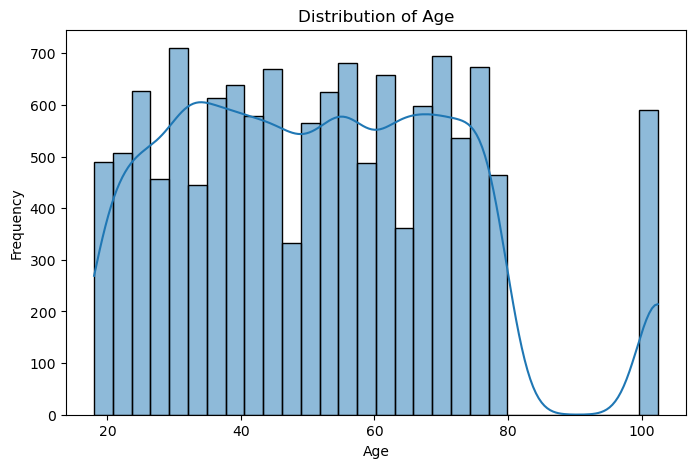

--- Analysis of Income ---


count     13000.000000
mean     146501.578731
std      105242.201769
min        5409.000000
25%       45579.000000
50%      134214.000000
75%      228786.250000
max      404427.908255
Name: Income, dtype: float64

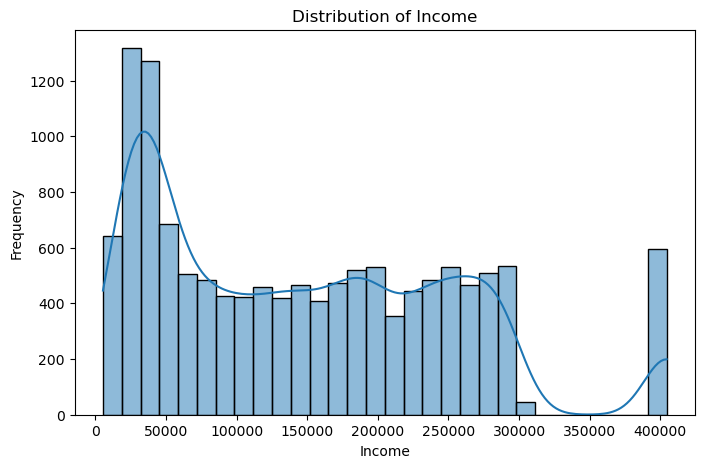

--- Analysis of Claim_Amount ---


count    13000.000000
mean     15557.675308
std      23521.366737
min        123.000000
25%       3516.750000
50%       6659.500000
75%       9509.250000
max      99841.000000
Name: Claim_Amount, dtype: float64

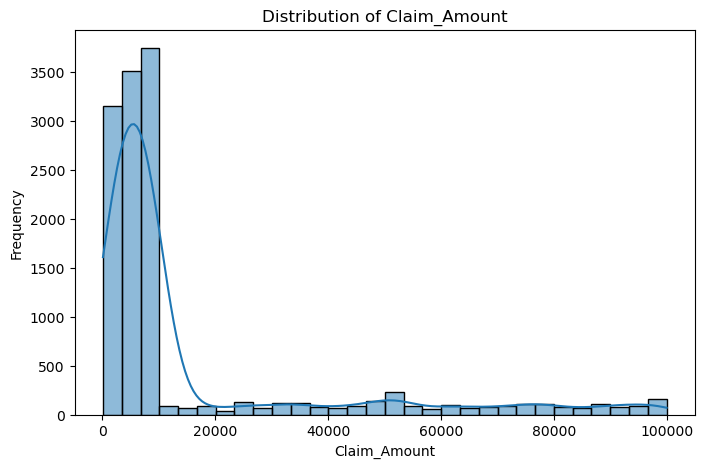

--- Analysis of Gender ---


Gender
Female    8366
Male      4634
Name: count, dtype: int64

Gender
Female    0.643538
Male      0.356462
Name: proportion, dtype: float64

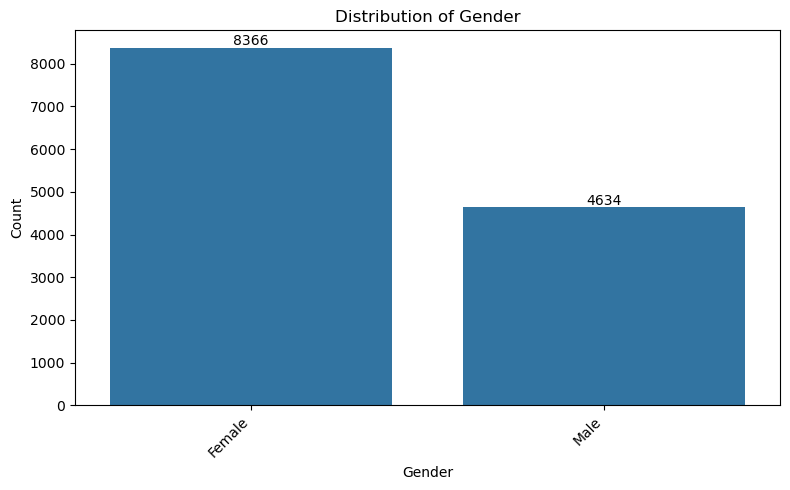

--- Analysis of Marital_Status ---


Marital_Status
Single     7735
Married    5265
Name: count, dtype: int64

Marital_Status
Single     0.595
Married    0.405
Name: proportion, dtype: float64

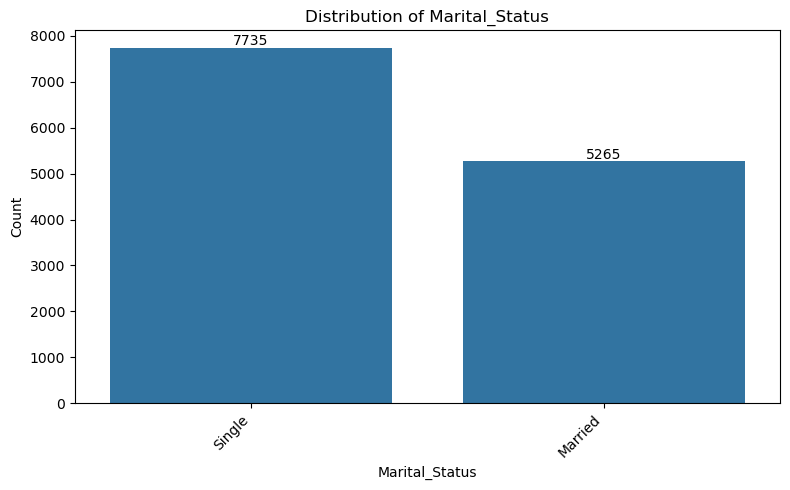

--- Analysis of Education ---


Education
Bachelor's    4471
PhD           4297
Master's      4232
Name: count, dtype: int64

Education
Bachelor's    0.343923
PhD           0.330538
Master's      0.325538
Name: proportion, dtype: float64

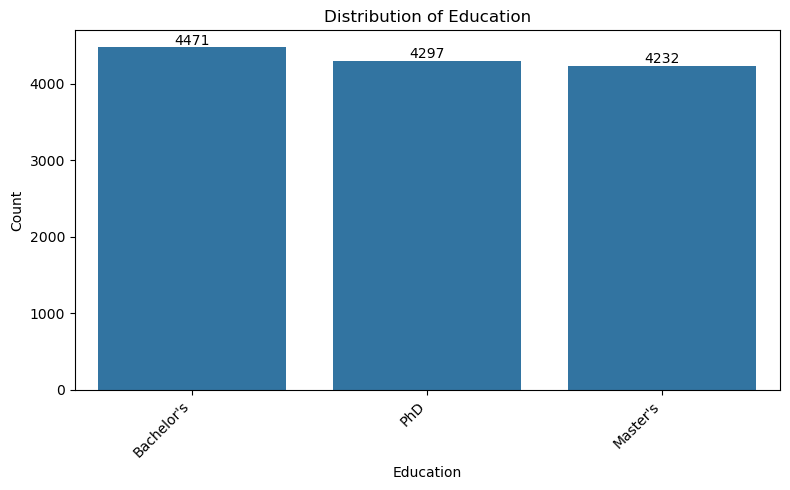

--- Analysis of Occupation ---


Occupation
CEO         5200
Engineer    2600
Waiter      1950
Teacher     1950
Doctor      1300
Name: count, dtype: int64

Occupation
CEO         0.40
Engineer    0.20
Waiter      0.15
Teacher     0.15
Doctor      0.10
Name: proportion, dtype: float64

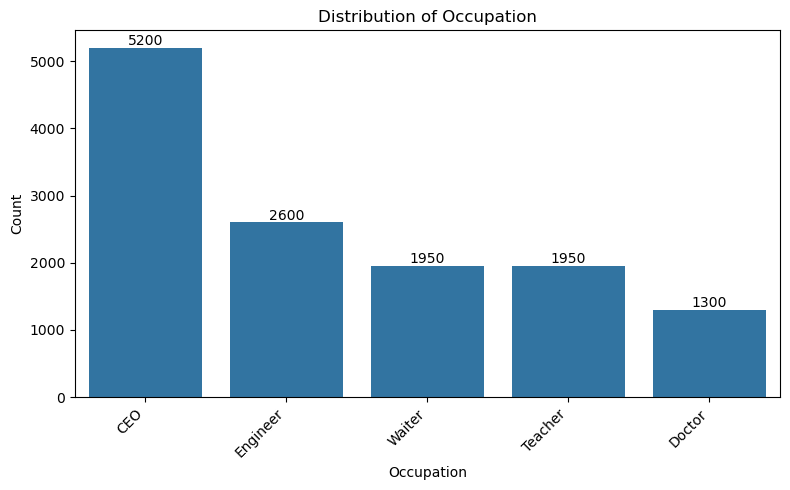

In [7]:

# Univariate analysis of numerical columns
numerical_cols = df1.select_dtypes(include=np.number).columns

for col in numerical_cols:
    print(f"--- Analysis of {col} ---")
    display(df1[col].describe())

    plt.figure(figsize=(8, 5))
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis of categorical columns
categorical_cols = df1.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"--- Analysis of {col} ---")
    display(df1[col].value_counts())
    display(df1[col].value_counts(normalize=True))

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df1, x=col, order=df1[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()


### ANALYSE BIVARIEE

--- Bivariate Analysis of Age and Gender ---


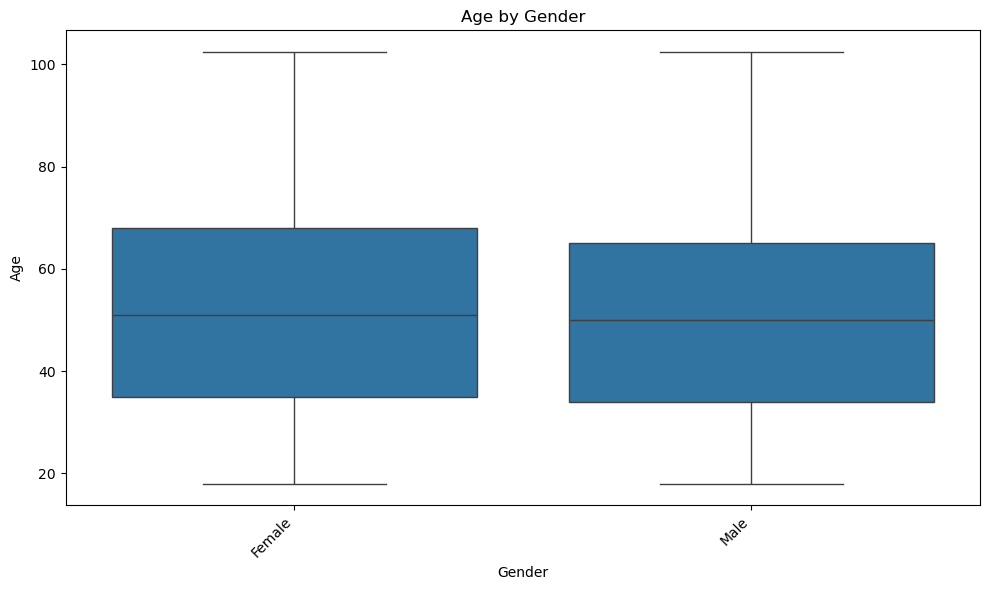

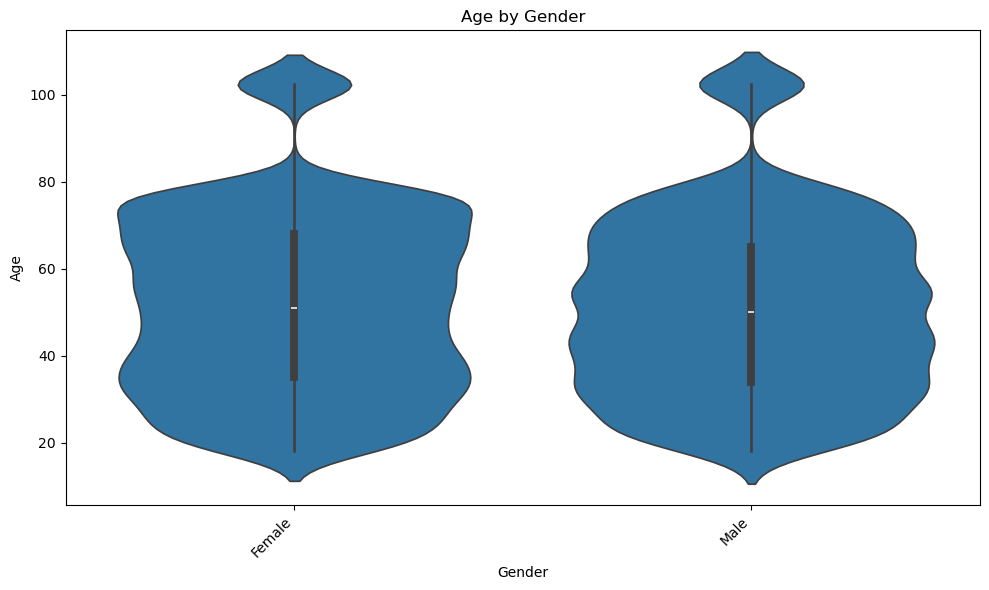

--- Bivariate Analysis of Age and Marital_Status ---


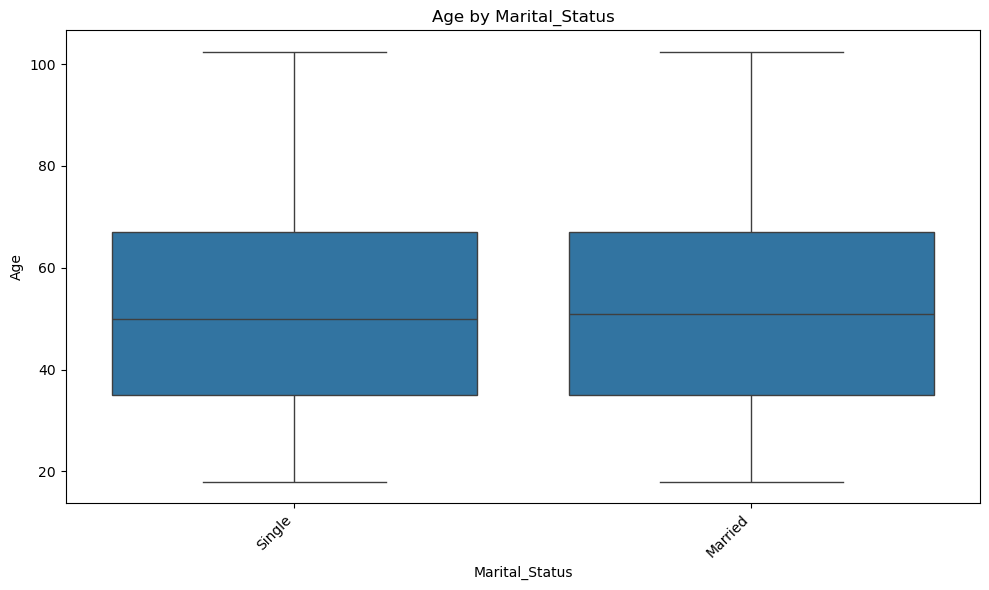

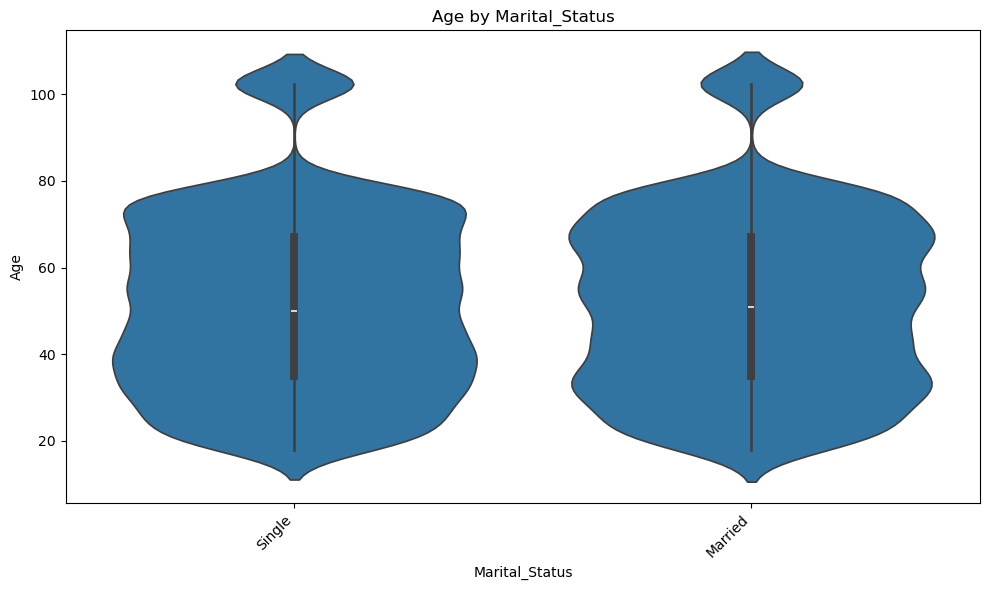

--- Bivariate Analysis of Age and Education ---


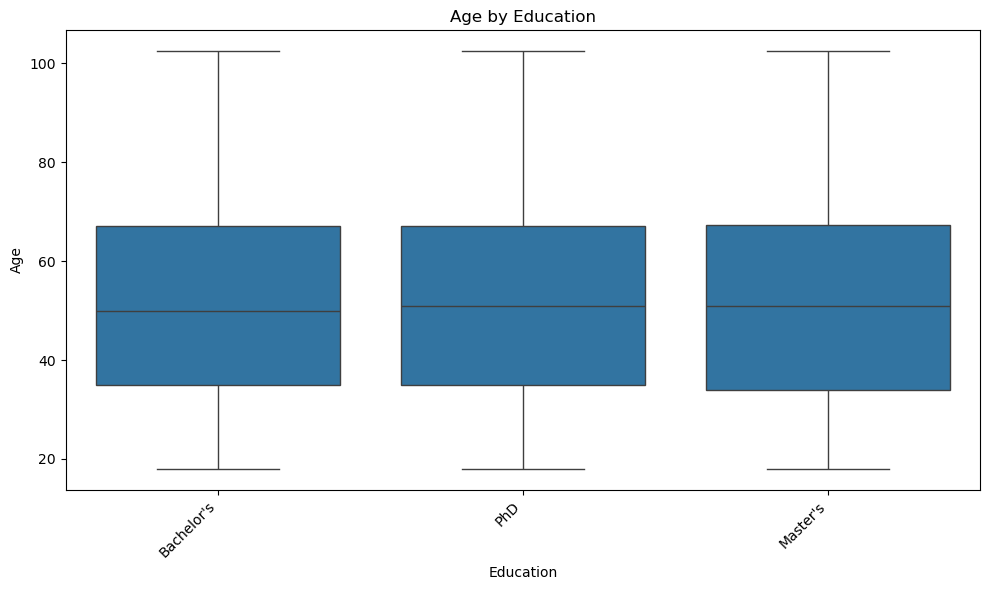

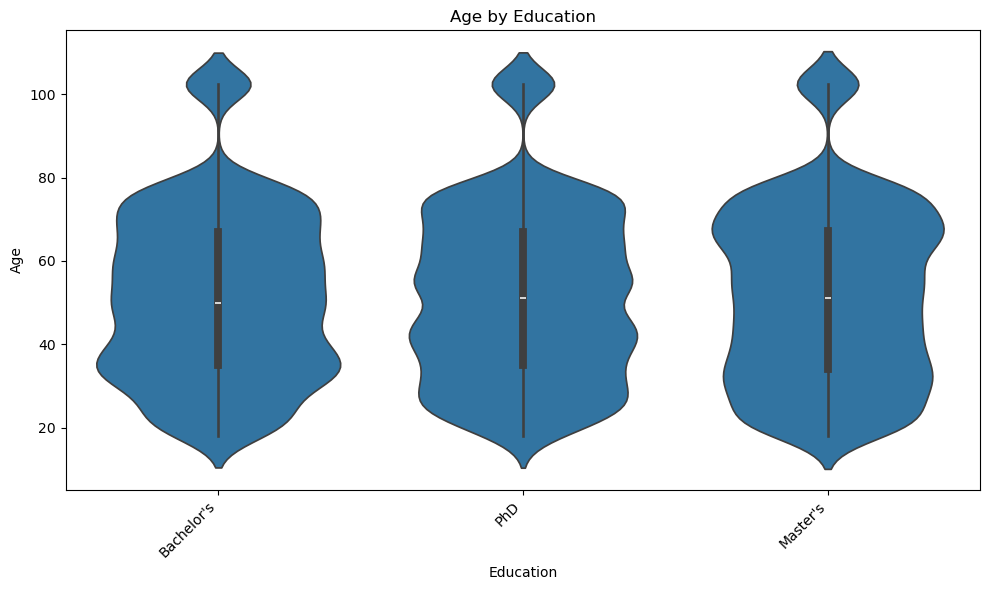

--- Bivariate Analysis of Age and Occupation ---


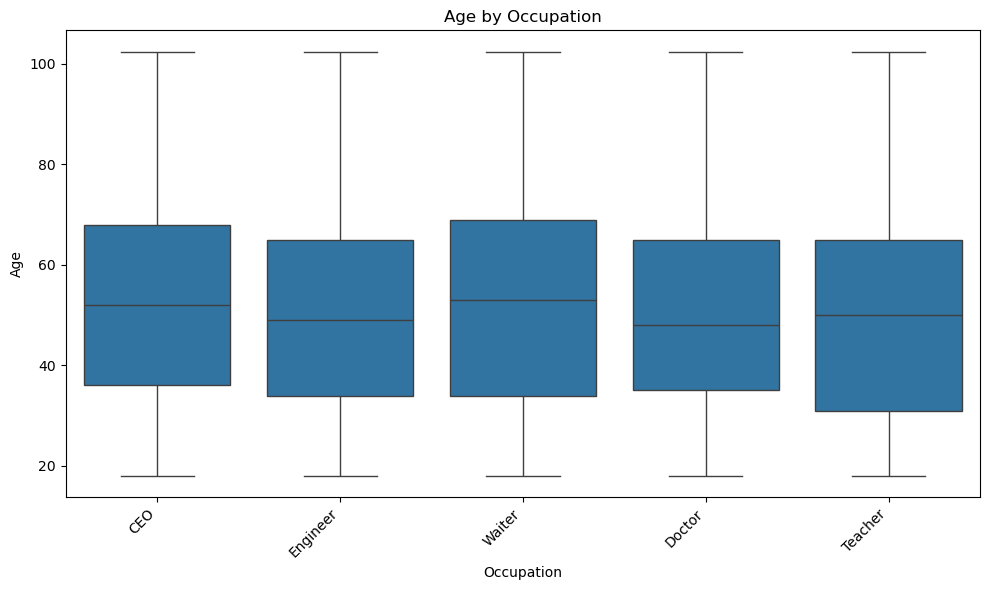

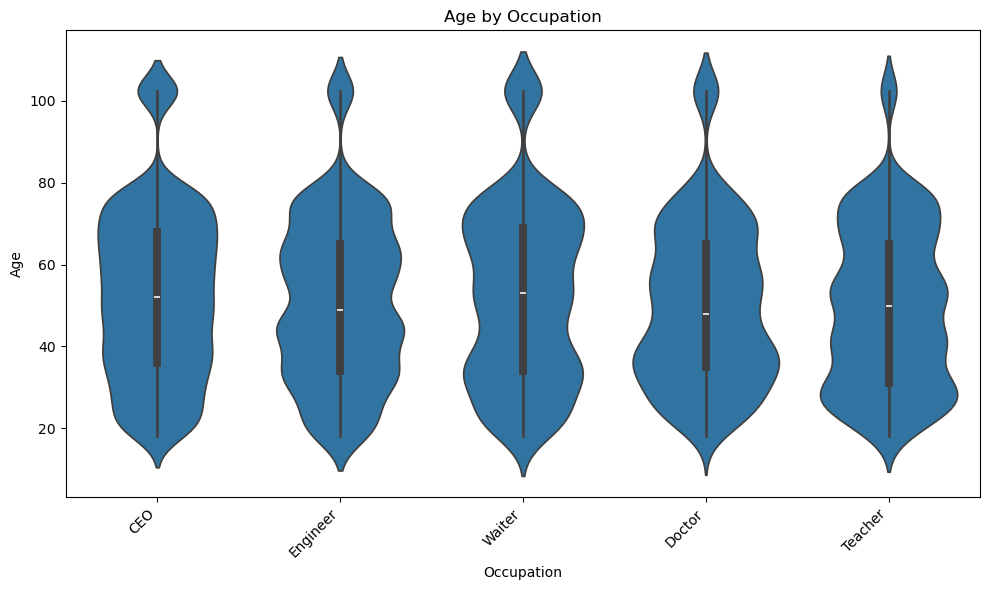

--- Bivariate Analysis of Income and Gender ---


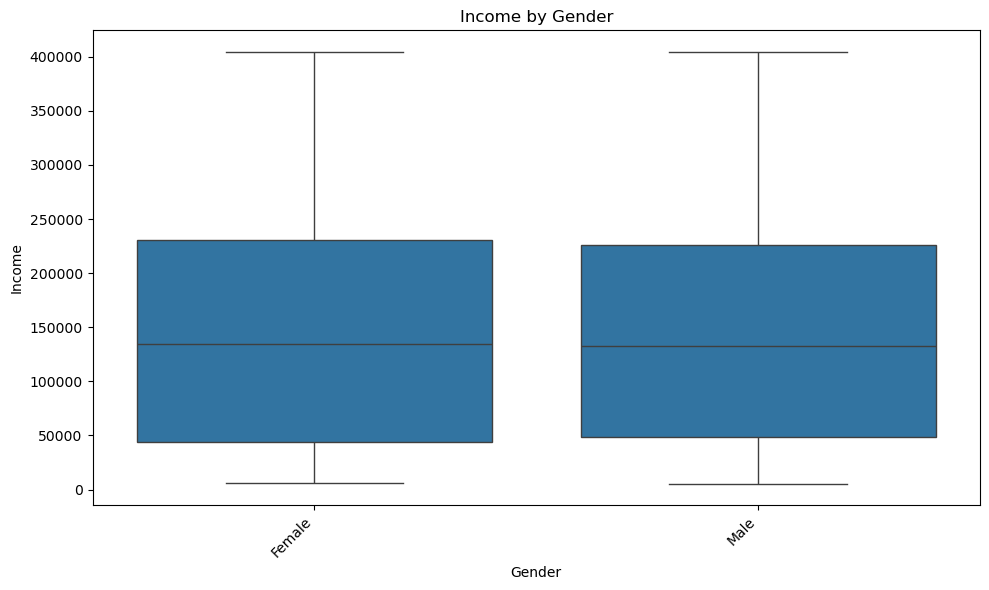

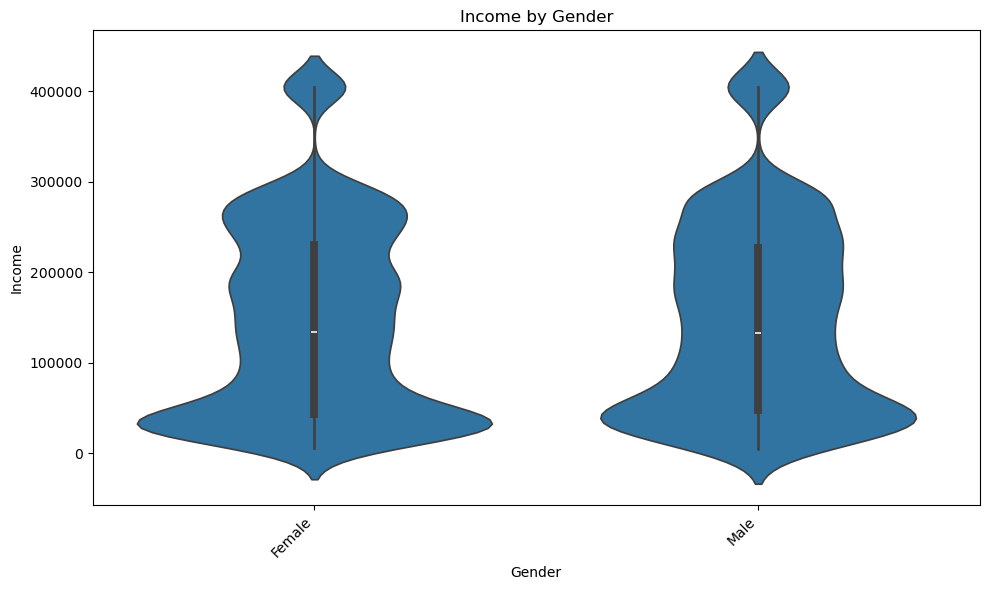

--- Bivariate Analysis of Income and Marital_Status ---


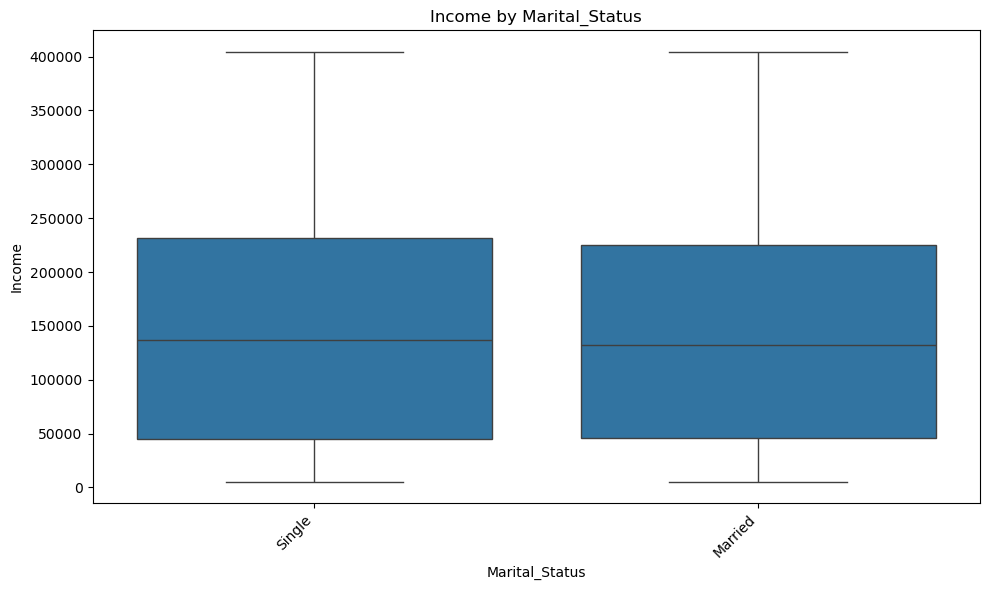

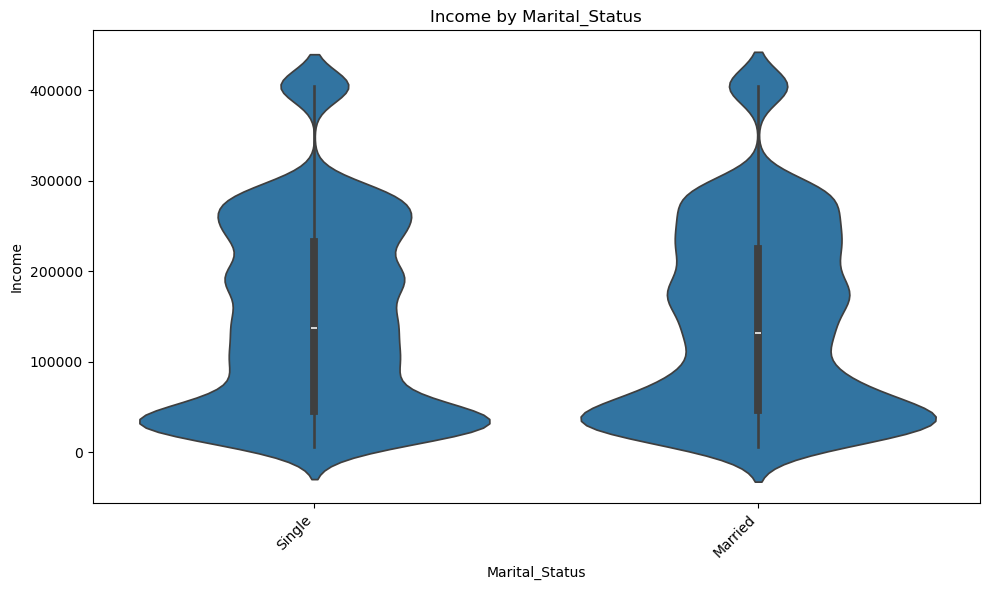

--- Bivariate Analysis of Income and Education ---


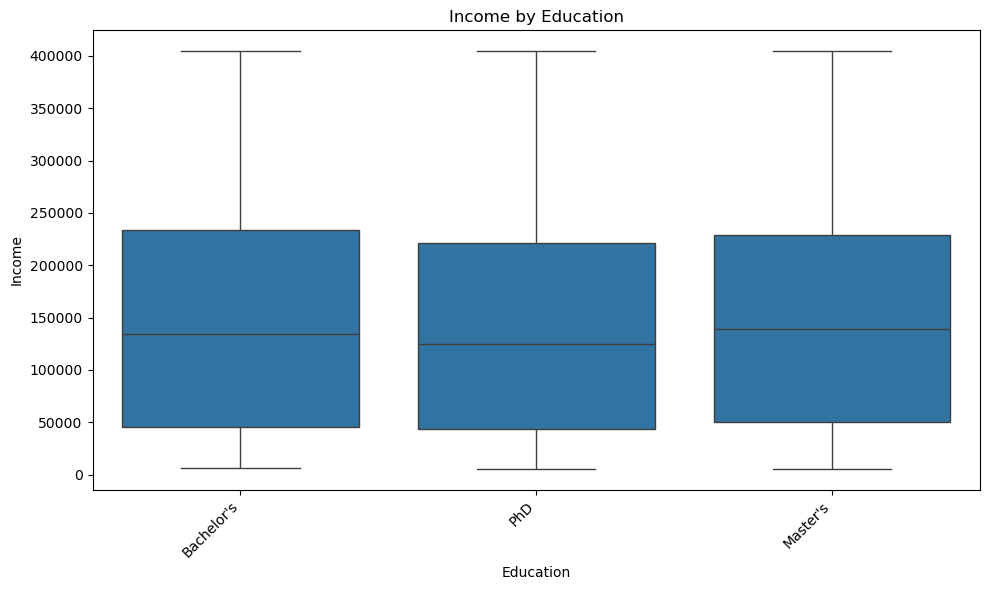

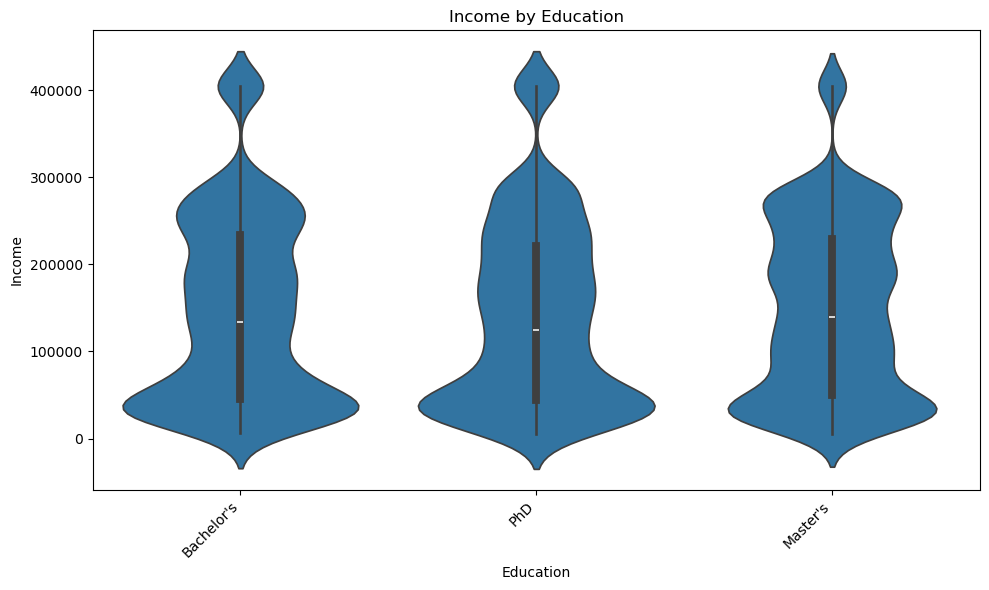

--- Bivariate Analysis of Income and Occupation ---


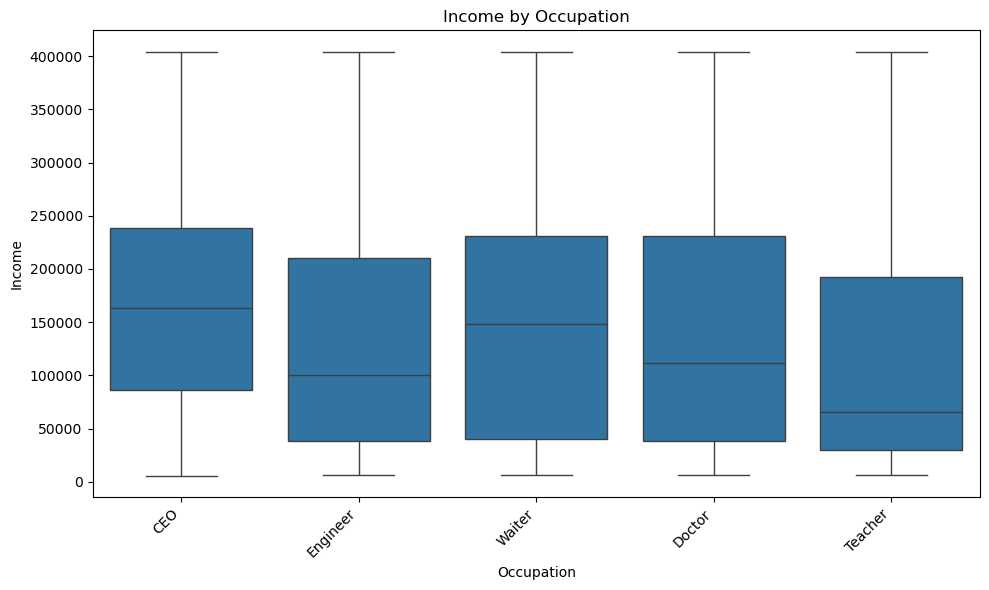

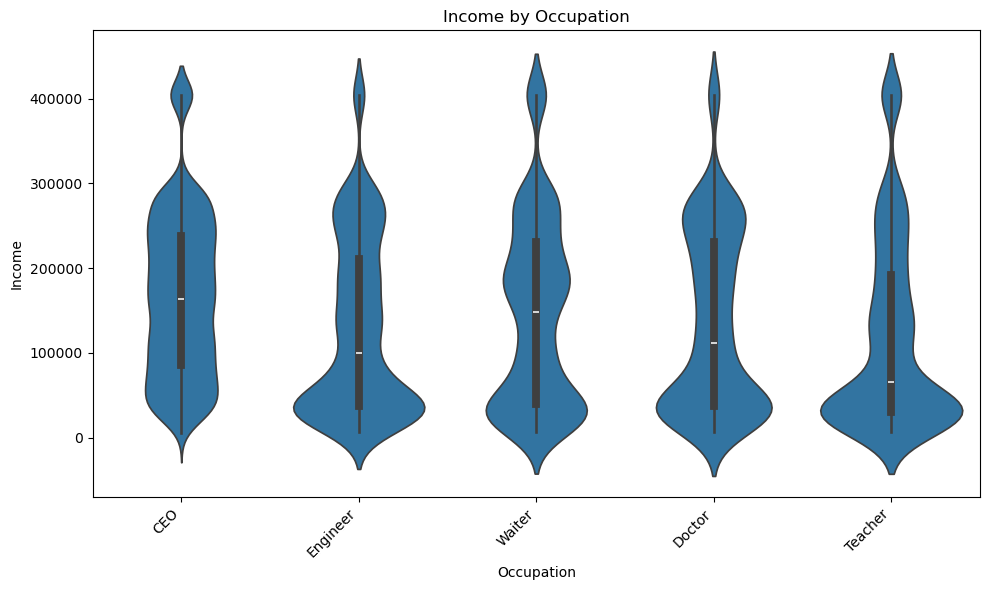

--- Bivariate Analysis of Claim_Amount and Gender ---


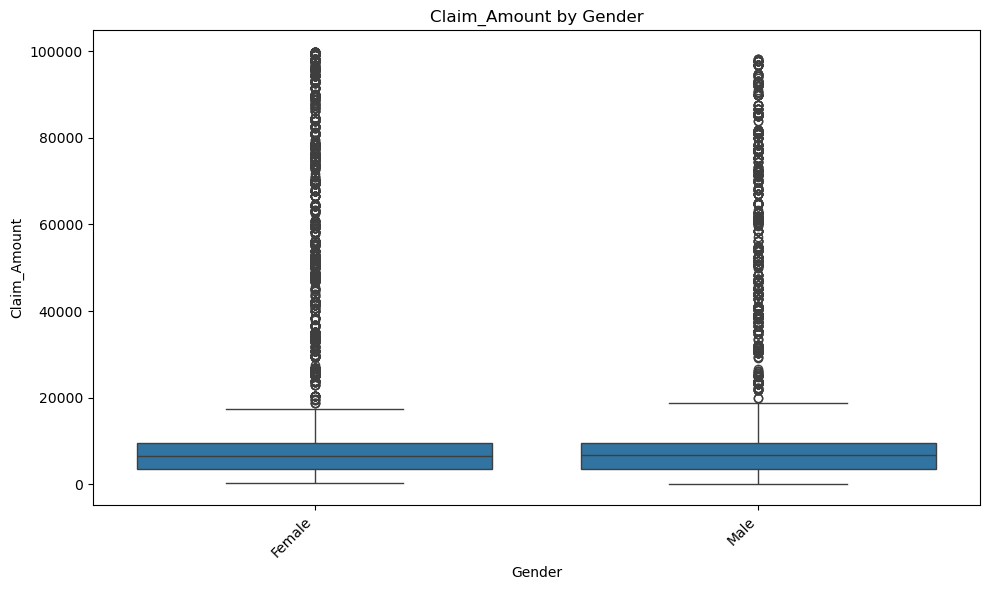

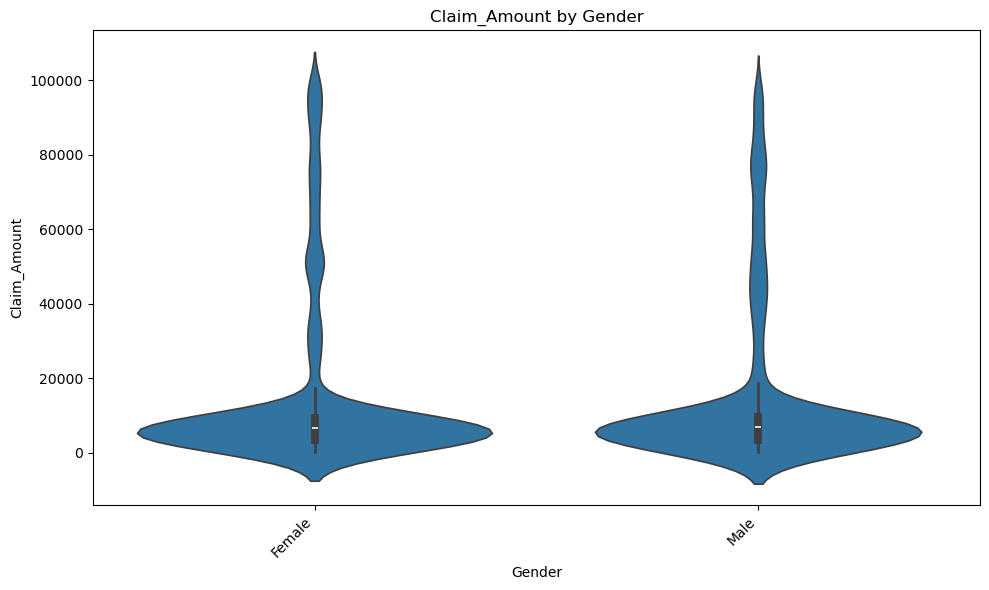

--- Bivariate Analysis of Claim_Amount and Marital_Status ---


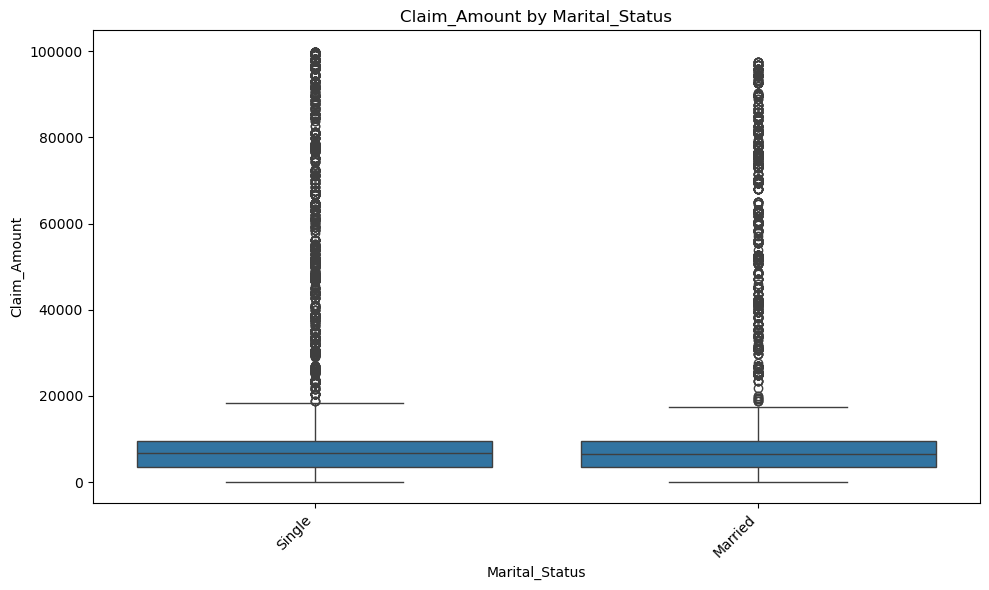

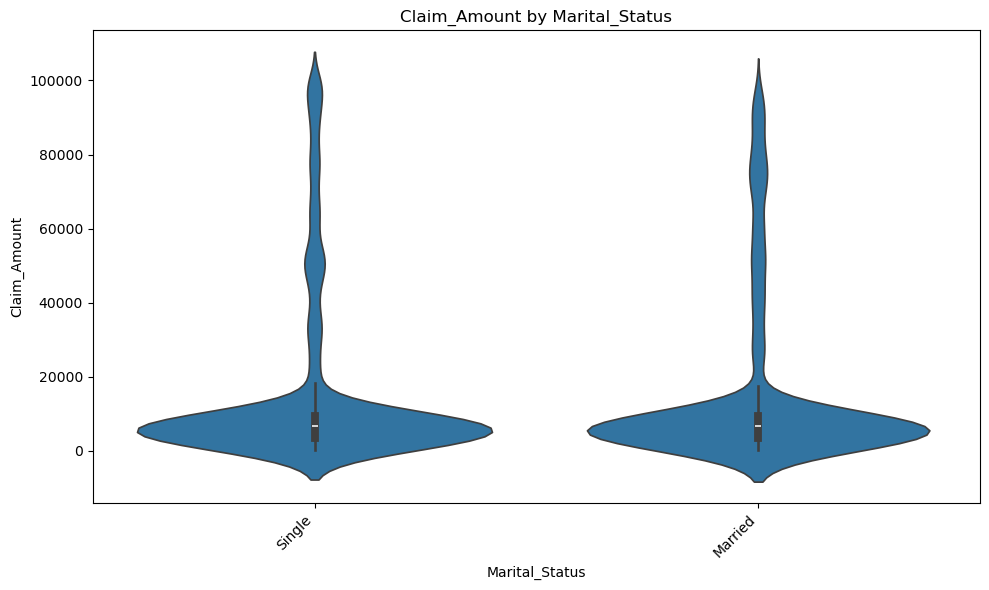

--- Bivariate Analysis of Claim_Amount and Education ---


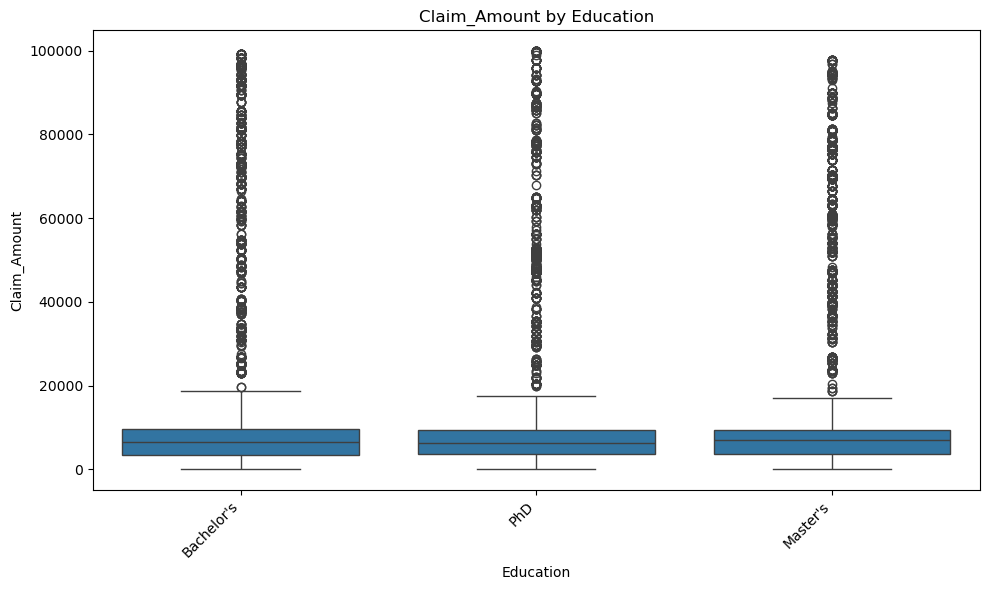

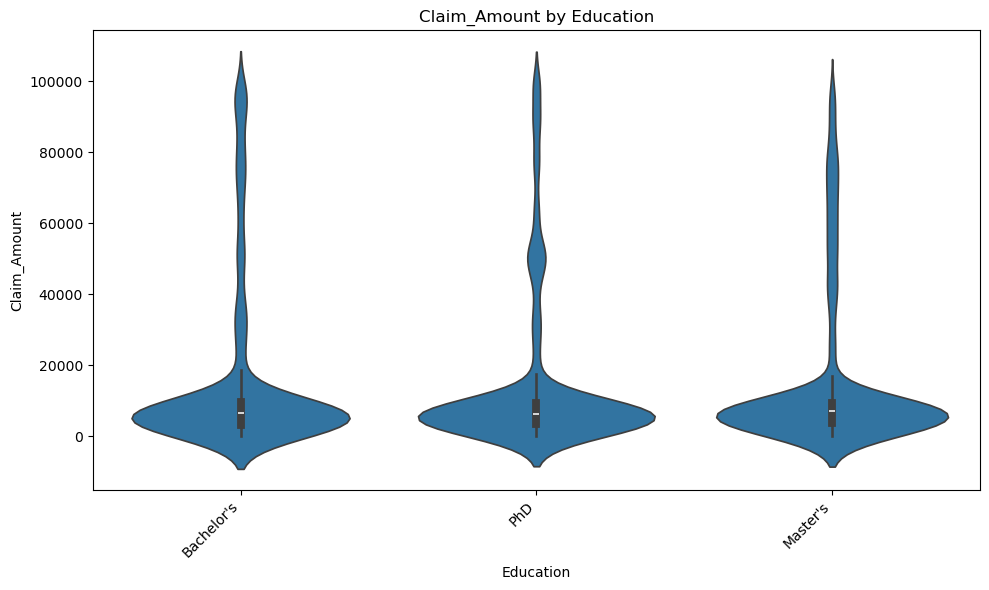

--- Bivariate Analysis of Claim_Amount and Occupation ---


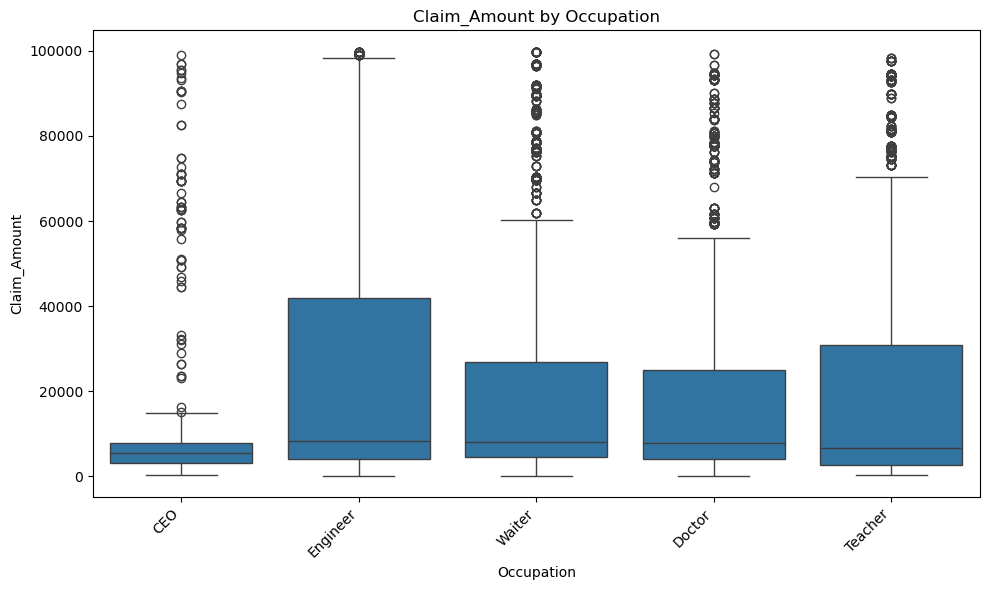

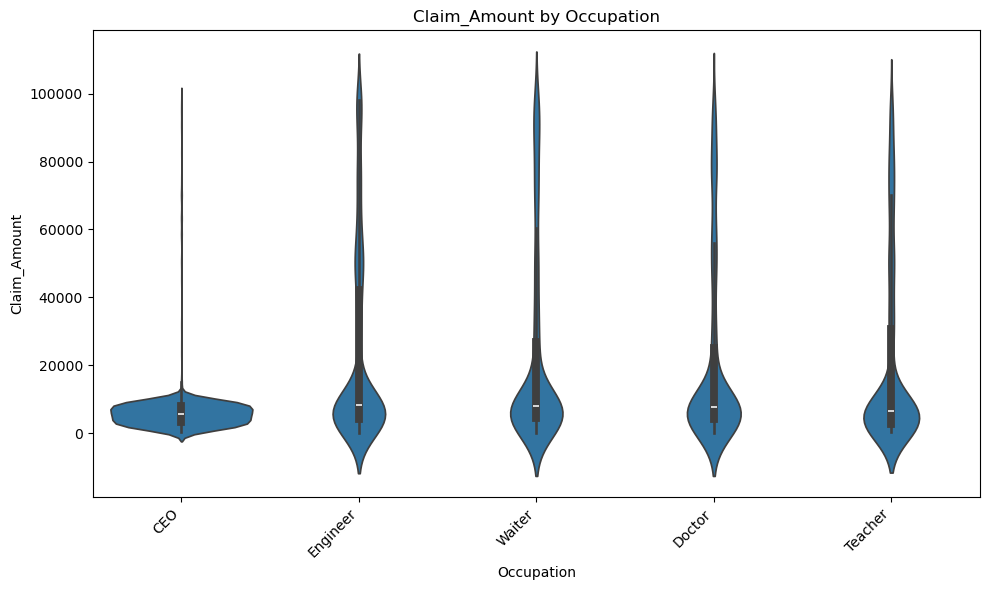

In [8]:
numerical_cols = df1.select_dtypes(include=np.number).columns
categorical_cols = df1.select_dtypes(include='object').columns

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        print(f"--- Bivariate Analysis of {num_col} and {cat_col} ---")

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df1, x=cat_col, y=num_col)
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # You can also use violin plots for a different perspective on the distribution
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df1, x=cat_col, y=num_col)
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


### Analyse multivariée : segmentation des assurées (K-Means)

c:\Users\mdied\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mdied\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\mdied\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mdied\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\mdied\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

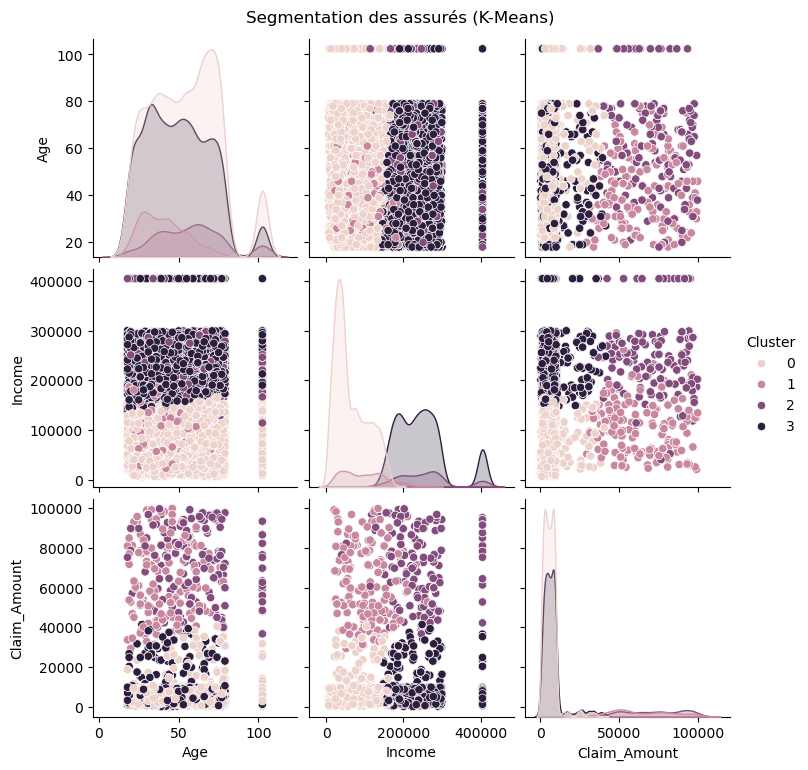

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df1[['Age', 'Income', 'Claim_Amount']]
X_scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(df1, vars=['Age', 'Income', 'Claim_Amount'], hue='Cluster')
plt.suptitle("Segmentation des assurés (K-Means)", y=1.02)
plt.show()

### MODELISATION

In [10]:
# Étape 1 : Définir les variables
features = ["Age", "Income", "Gender", "Marital_Status", "Education", "Occupation"]
target = "Claim_Amount"

# Étape 2 : Encodage des variables catégorielles (one-hot, sans la première modalité pour éviter colinéarité)
df_encoded = pd.get_dummies(df1[features], drop_first=True)

# Convert boolean columns to integers (0s and 1s)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)


# Étape 3 : Ajouter constante (intercept)
X = sm.add_constant(df_encoded)
y = df1[target]

# Étape 4 : Séparation train / test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 5 : Entraînement du modèle avec statsmodels
model = sm.OLS(y_train, X_train).fit()

# Étape 6 : Affichage du résumé (comme sous R)
print(model.summary())

# Étape 7 : Prédiction sur test + calcul du RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Étape 8 : Affichage du RMSE
print(f"\n📉 RMSE sur le jeu de test : {rmse:.2f} €")

                            OLS Regression Results                            
Dep. Variable:           Claim_Amount   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     175.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        00:47:38   Log-Likelihood:            -1.1865e+05
No. Observations:               10400   AIC:                         2.373e+05
Df Residuals:                   10389   BIC:                         2.374e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   640.10

### Lasso et les modèles non linéaires

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# 1. Reprendre le X et y encodés
X = pd.get_dummies(df1[["Age", "Income", "Gender", "Marital_Status", "Education", "Occupation"]], drop_first=True)
y = df1["Claim_Amount"]

# 2. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialiser les modèles
models = {
    "Lasso": LassoCV(cv=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
}

# 4. Entraîner et évaluer
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

# 5. Résultats comparés
print("📊 Résultats comparés :")
print(f"{'Modèle':<15} | {'RMSE (€)':<10} | {'R²':<6}")
print("-" * 40)
for name, rmse, r2 in results:
    print(f"{name:<15} | {rmse:<10.2f} | {r2:<.3f}")

📊 Résultats comparés :
Modèle          | RMSE (€)   | R²    
----------------------------------------
Lasso           | 23036.84   | 0.028
Random Forest   | 5097.54    | 0.952
XGBoost         | 15687.36   | 0.549


### Visualisation des prédictions

In [12]:
# 1. Prédictions avec le meilleur modèle
best_model = models["Random Forest"]
y_pred_rf = best_model.predict(X_test)
residuals = y_test - y_pred_rf

# 2. Vrai vs Prédit
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs prédictions – Random Forest")
plt.grid(True)
plt.show()

# 3. Résidus
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=50, color='orange')
plt.title("Distribution des résidus – Random Forest")
plt.xlabel("Erreur de prédiction (résidus)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

NameError: name 'models' is not defined

### Importance des variables

C:\Users\mdied\AppData\Local\Temp\ipykernel_34128\1118292424.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="viridis")


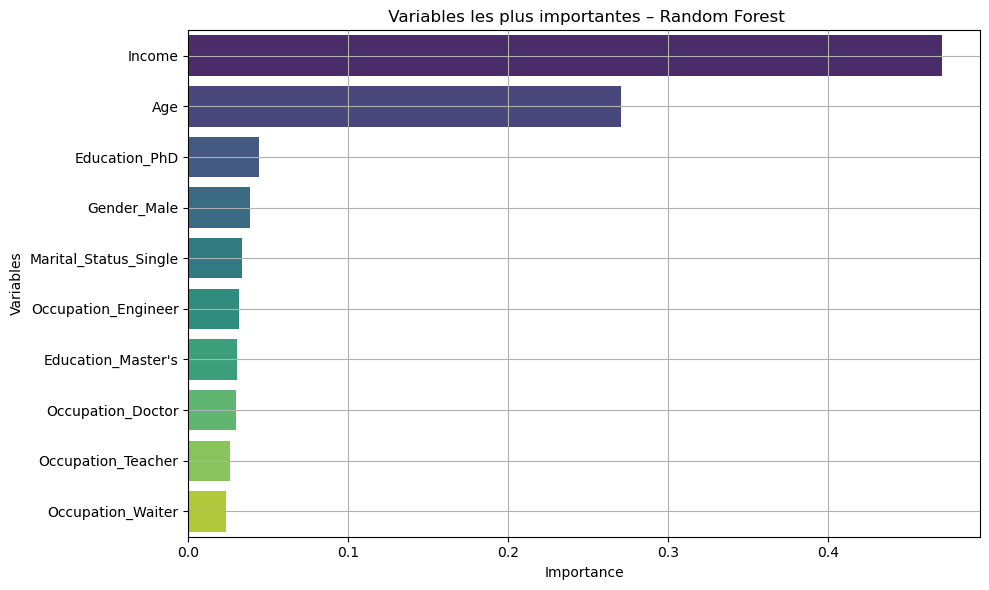

In [12]:
# Récupérer l’importance des features
importances = best_model.feature_importances_
features_names = X_train.columns

# Créer un DataFrame trié
feat_importances = pd.DataFrame({'Feature': features_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False).head(15)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="viridis")
plt.title(" Variables les plus importantes – Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.grid(True)
plt.tight_layout()
plt.show()

# DEUXIEME PARTIE :

In [43]:
df2

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,...,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
0,84966,23,Female,Married,Entrepreneur,70541,Associate Degree,Mizoram,37534,policy5,...,Email,In-Person Meeting,Afternoon,English,1,3,728,DUI,Job Change,Segment5
1,95568,26,Male,Widowed,Manager,54168,Doctorate,Goa,63304,policy5,...,Mail,In-Person Meeting,Morning,French,1,2,792,Clean,Retirement,Segment5
2,10544,29,Female,Single,Entrepreneur,73899,Associate Degree,Rajasthan,53174,policy5,...,Email,Mail,Evening,German,2,1,719,Accident,Childbirth,Segment3
3,77033,20,Male,Divorced,Entrepreneur,63381,Bachelor's Degree,Sikkim,22803,policy5,...,Text,In-Person Meeting,Anytime,French,3,0,639,DUI,Job Change,Segment3
4,88160,25,Female,Separated,Manager,38794,Bachelor's Degree,West Bengal,92858,policy1,...,Email,Text,Weekends,English,0,3,720,Major Violations,Childbirth,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Salesperson,120850,Associate Degree,Andaman and Nicobar Islands,41883,policy3,...,In-Person Meeting,Phone,Afternoon,German,3,3,506,Clean,Job Change,Segment5
53499,65485,61,Male,Single,Entrepreneur,122309,Doctorate,Himachal Pradesh,62101,policy5,...,Text,Mail,Afternoon,German,0,0,543,Major Violations,Divorce,Segment1
53500,26213,25,Male,Divorced,Teacher,49258,Doctorate,Assam,49116,policy2,...,Text,Text,Weekends,French,0,0,803,Major Violations,Marriage,Segment4
53501,63136,42,Male,Married,Artist,66301,Doctorate,Andhra Pradesh,13642,policy4,...,Mail,Phone,Morning,French,1,3,803,Clean,Marriage,Segment5


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Occupation                          53503 non-null  object
 5   Income Level                        53503 non-null  int64 
 6   Education Level                     53503 non-null  object
 7   Geographic Information              53503 non-null  object
 8   Location                            53503 non-null  int64 
 9   Behavioral Data                     53503 non-null  object
 10  Purchase History                    53503 non-null  object
 11  Policy Start Date                   53503 non-null  ob

In [44]:
# Suppression des variables jugées inutiles
columns_to_drop = [
    'Customer ID', 'Policy Type',
    'Behavioral Data',
    'Segmentation Group',
    'Location',
    'Geographic Information',
    'Purchase History',
    'Policy Start Date',
    'Policy Renewal Date',
    'Insurance Products Owned'
]

df_cleaned = df2.drop(columns=columns_to_drop)

# Aperçu des dimensions et des colonnes restantes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 53503 non-null  int64 
 1   Gender                              53503 non-null  object
 2   Marital Status                      53503 non-null  object
 3   Occupation                          53503 non-null  object
 4   Income Level                        53503 non-null  int64 
 5   Education Level                     53503 non-null  object
 6   Claim History                       53503 non-null  int64 
 7   Interactions with Customer Service  53503 non-null  object
 8   Coverage Amount                     53503 non-null  int64 
 9   Premium Amount                      53503 non-null  int64 
 10  Deductible                          53503 non-null  int64 
 11  Customer Preferences                53503 non-null  ob

### Répartition des classes deRisk Profile

Répartition des classes de 'Risk Profile':
Classe 0 : 11405 assurés (21.32 %)
Classe 1 : 15393 assurés (28.77 %)
Classe 2 : 10058 assurés (18.80 %)
Classe 3 : 16647 assurés (31.11 %)


C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\2819356879.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Risk Profile', palette='Set2')


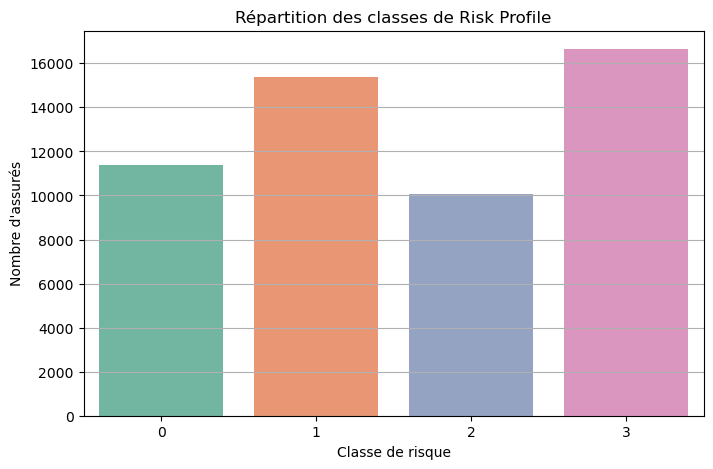

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Répartition des classes
risk_counts = df_cleaned['Risk Profile'].value_counts().sort_index()
risk_percent = df_cleaned['Risk Profile'].value_counts(normalize=True).sort_index() * 100

# Affichage des effectifs et pourcentages
print("Répartition des classes de 'Risk Profile':")
for i in range(len(risk_counts)):
    print(f"Classe {risk_counts.index[i]} : {risk_counts.iloc[i]} assurés ({risk_percent.iloc[i]:.2f} %)")

# Visualisation
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Risk Profile', palette='Set2')
plt.title("Répartition des classes de Risk Profile")
plt.xlabel("Classe de risque")
plt.ylabel("Nombre d'assurés")
plt.grid(axis='y')
plt.show()

### Analyse univariée des variables numériques

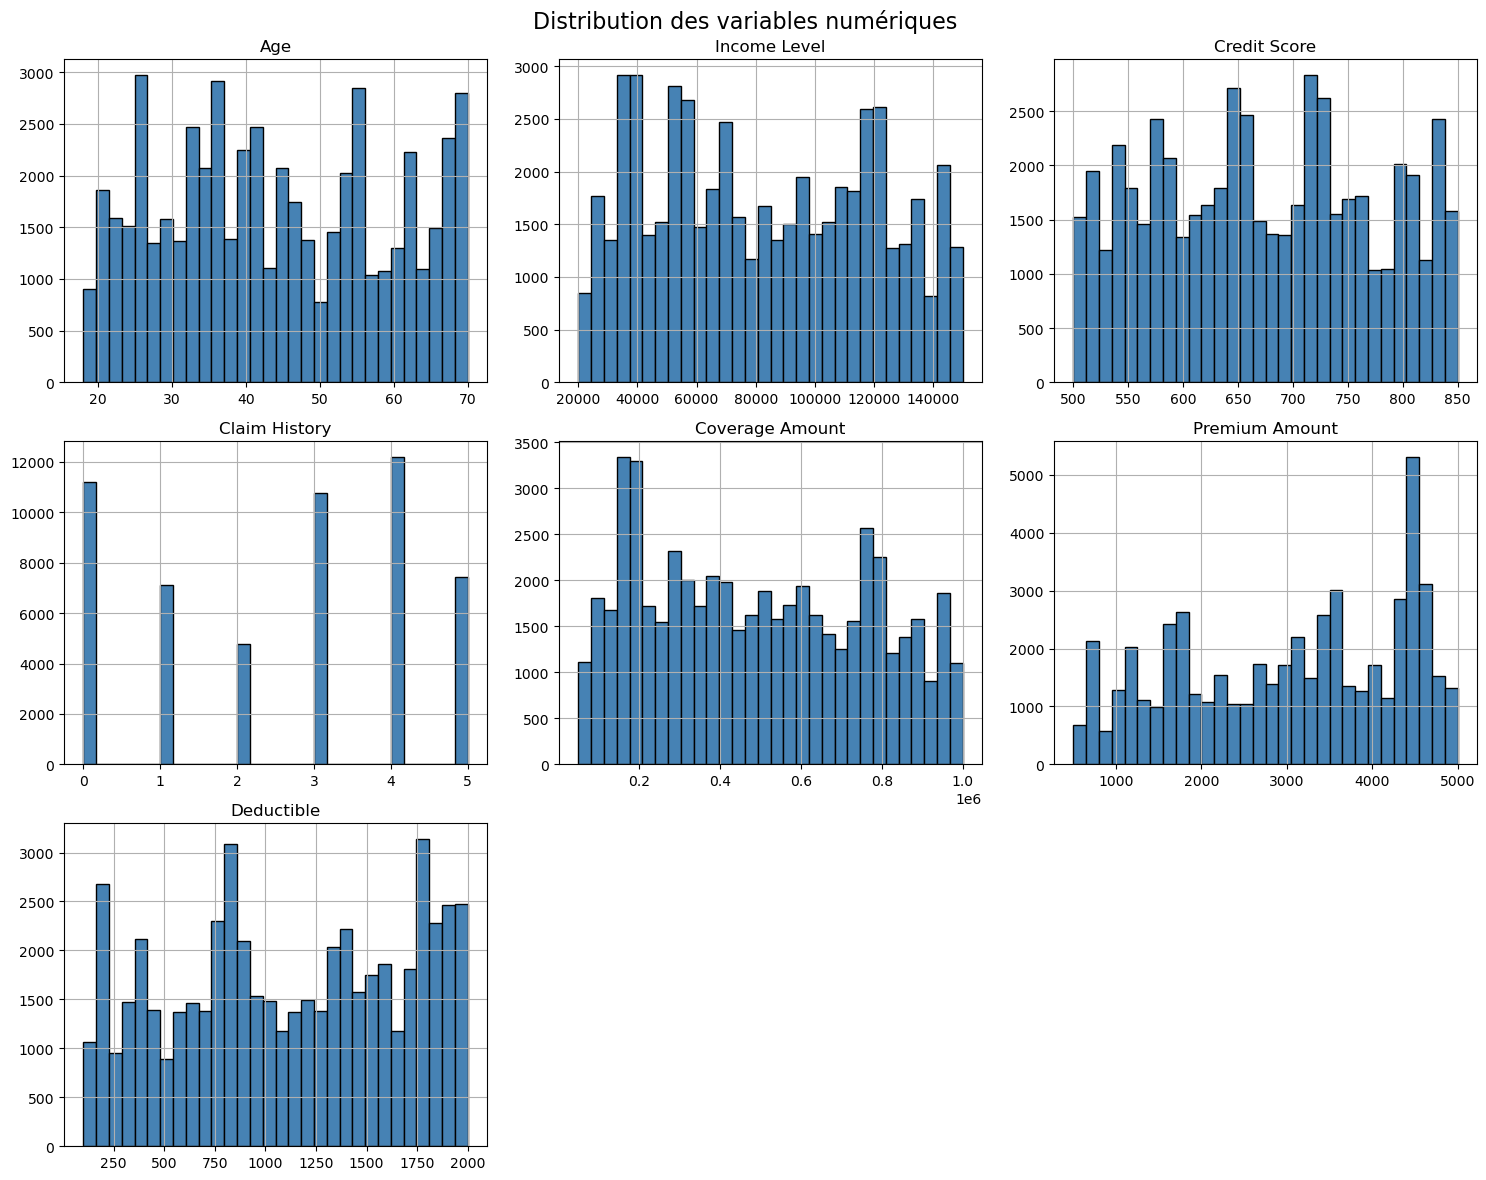

In [46]:
# Variables numériques à explorer
num_cols = ['Age', 'Income Level', 'Credit Score', 'Claim History', 'Coverage Amount', 'Premium Amount', 'Deductible']

# Histogrammes
df_cleaned[num_cols].hist(figsize=(15, 12), bins=30, color='steelblue', edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

### Analyse bivariée — Boxplots et Barplots

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


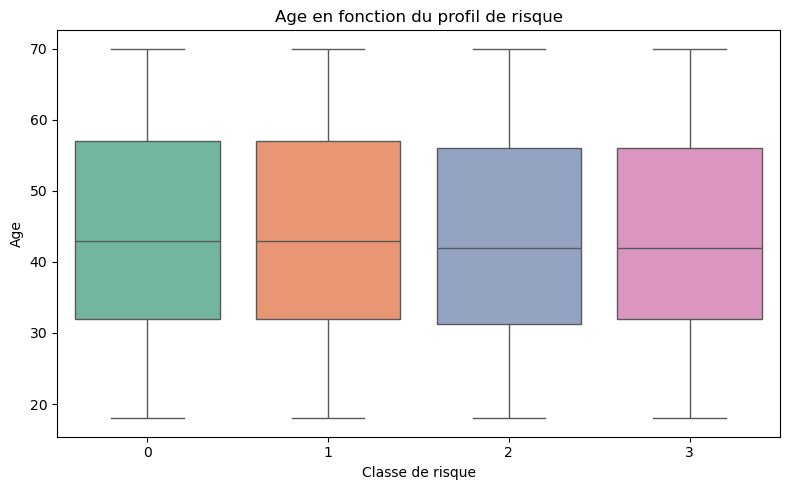

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


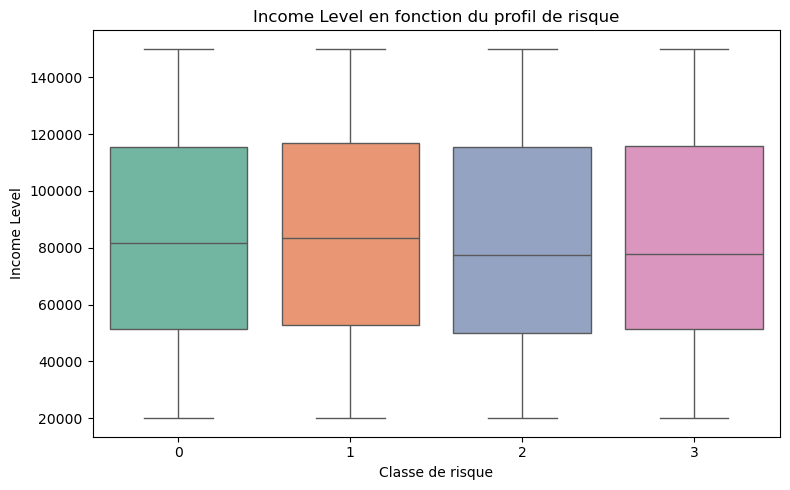

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


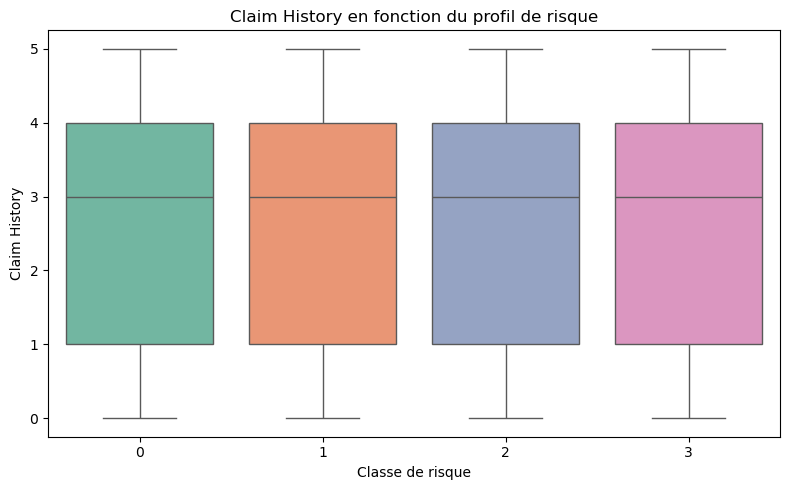

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


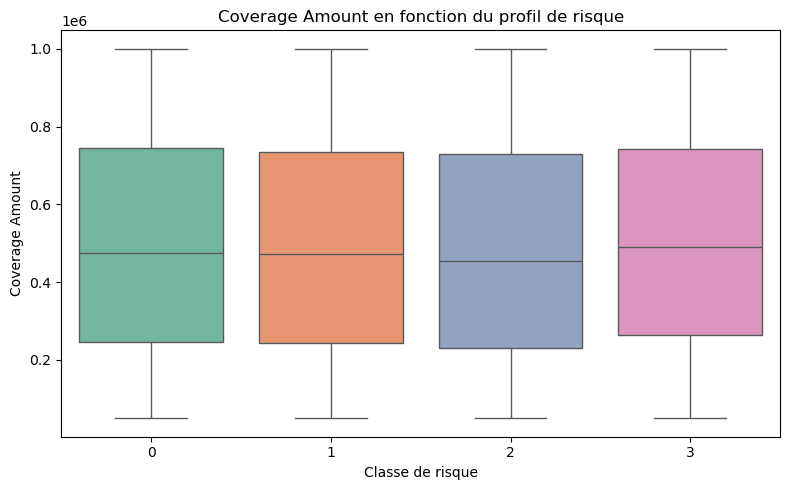

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


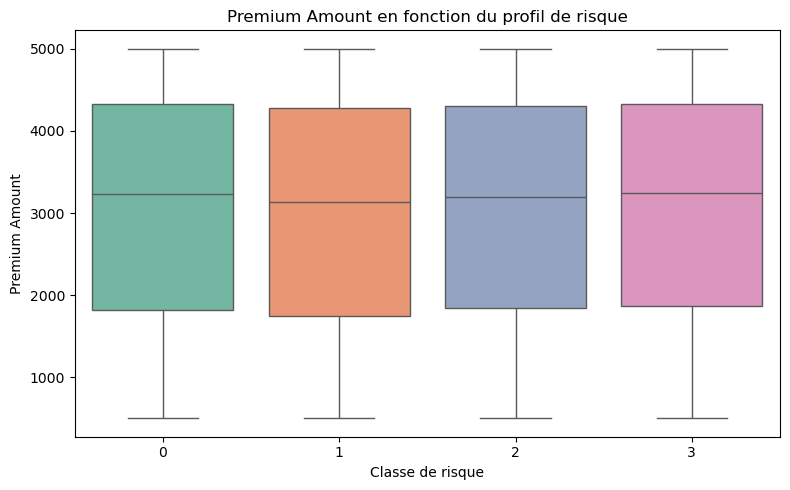

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


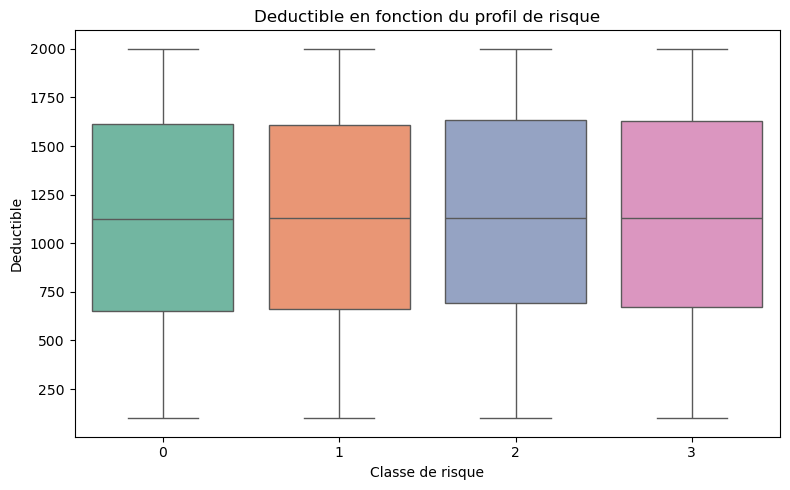

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


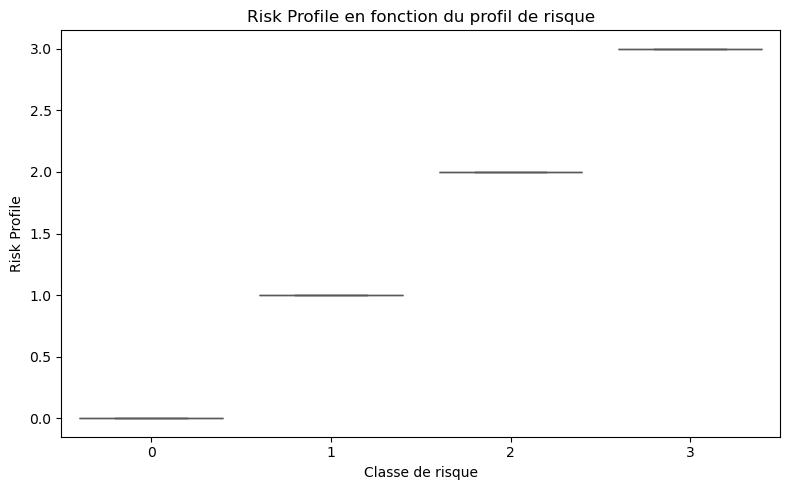

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


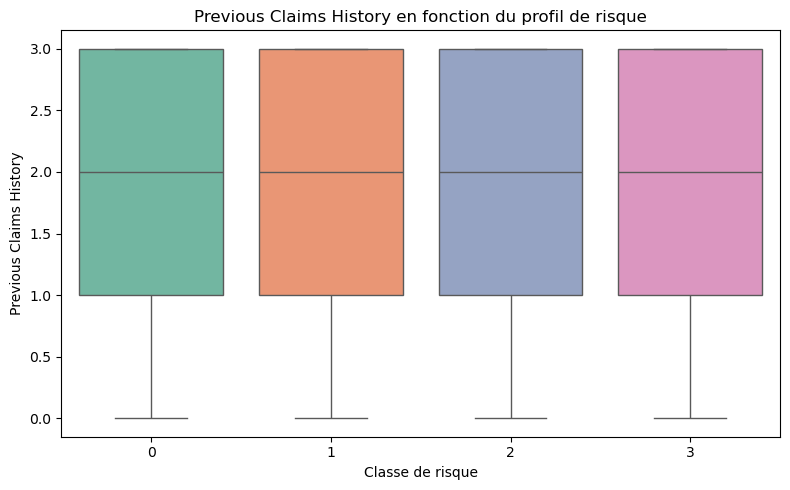

C:\Users\mdied\AppData\Local\Temp\ipykernel_16936\1784910091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')


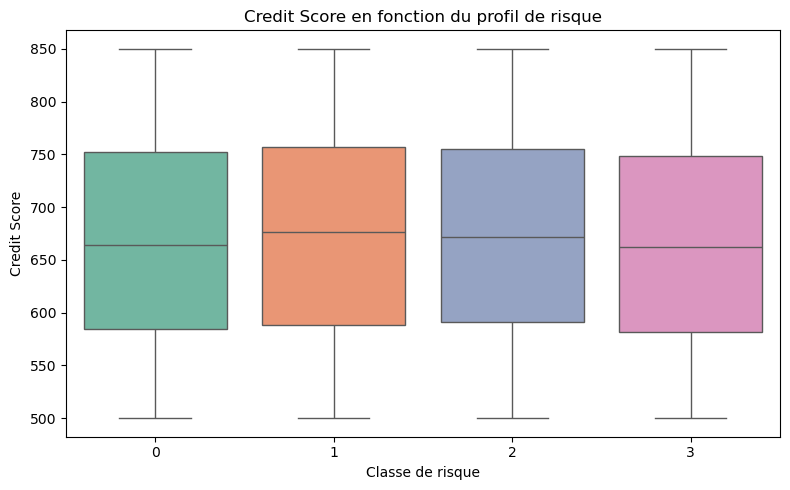

In [47]:
# Boxplots : Variables numériques vs Risk Profile
num_vars = df_cleaned.select_dtypes(include='number')
#num_vars = ['Age', 'Income Level', 'Credit Score', 'Claim History']

for var in num_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Risk Profile', y=var, data=df_cleaned, palette='Set2')
    plt.title(f'{var} en fonction du profil de risque')
    plt.xlabel('Classe de risque')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

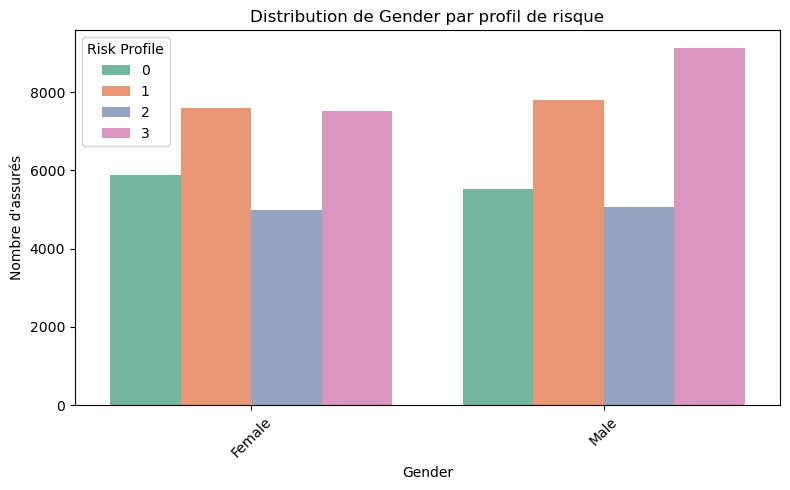

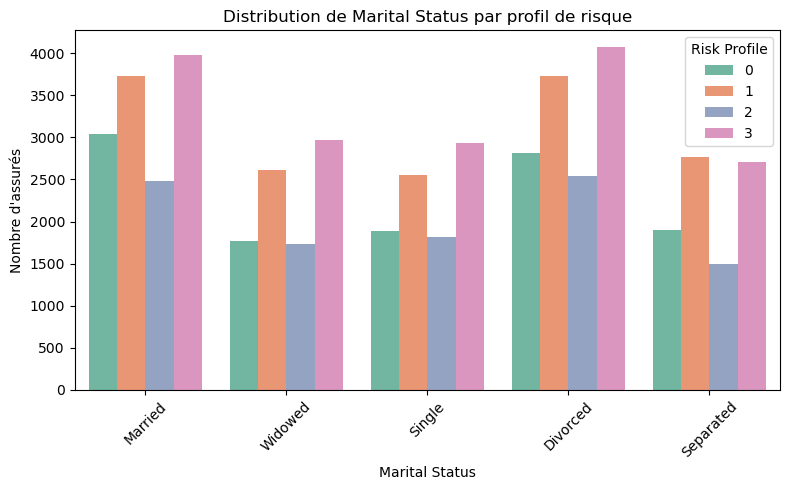

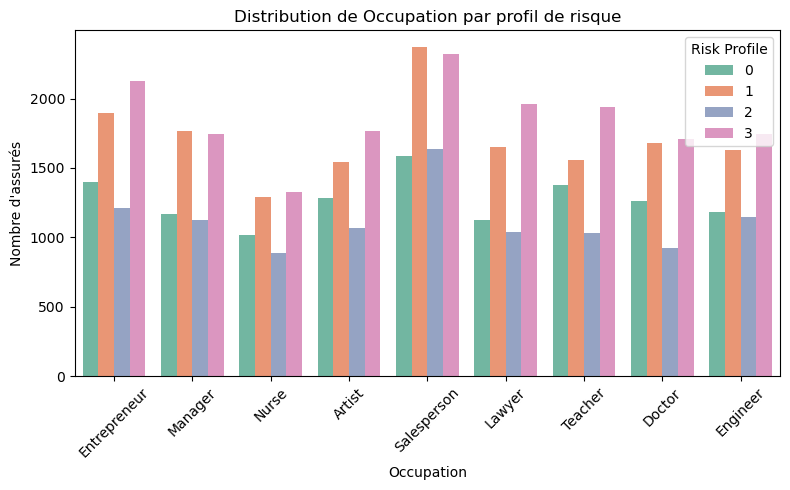

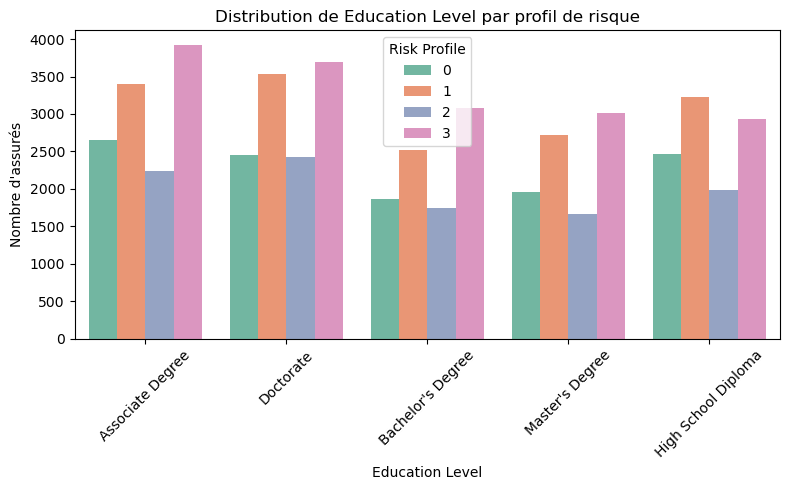

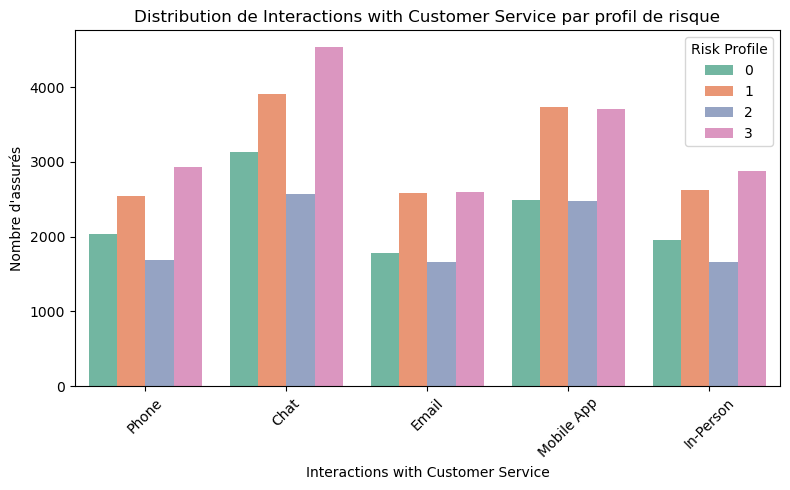

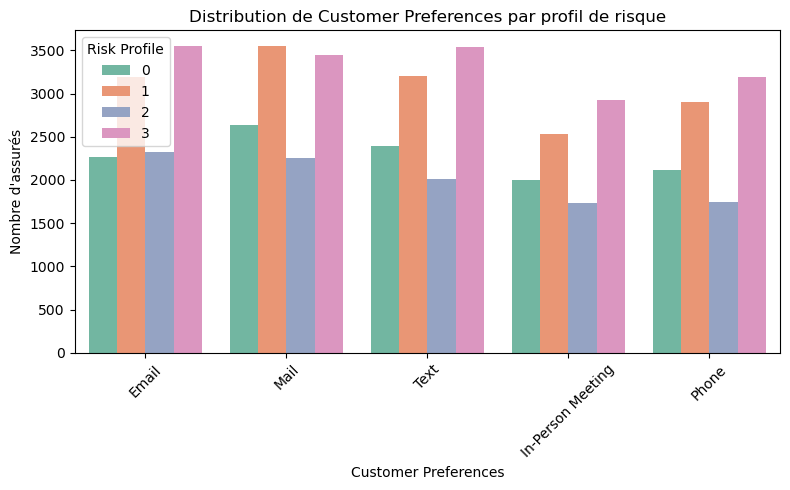

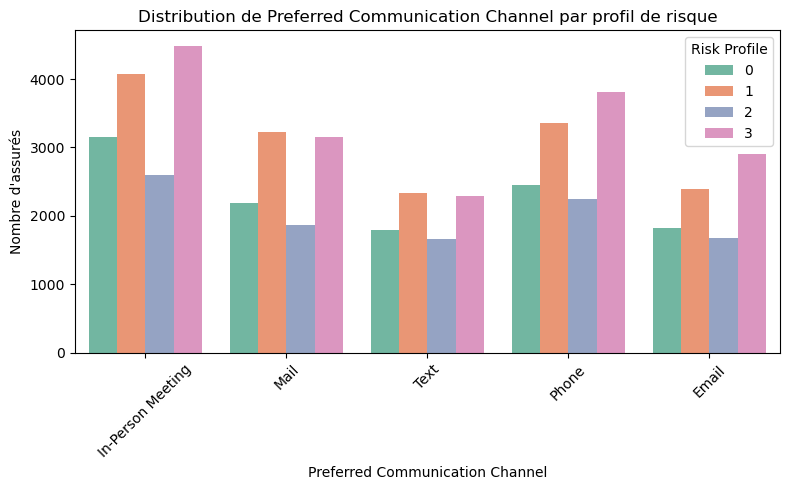

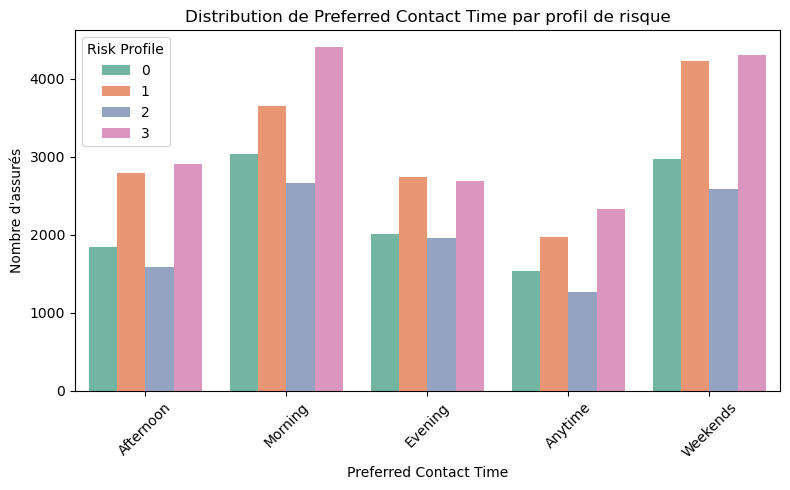

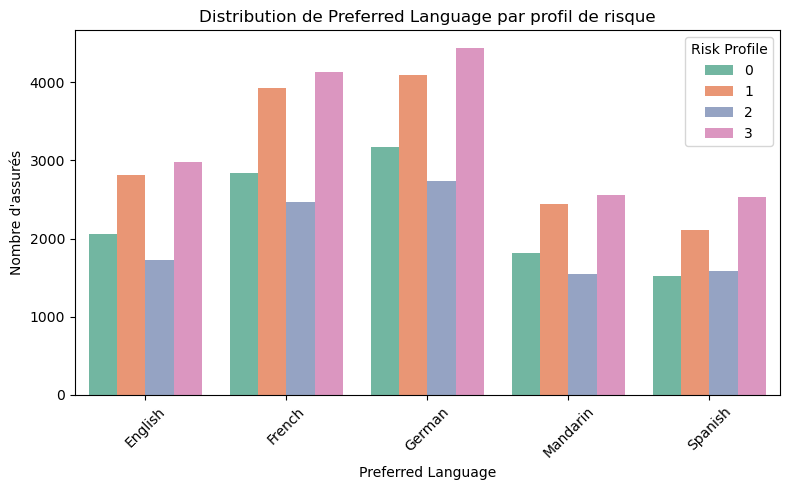

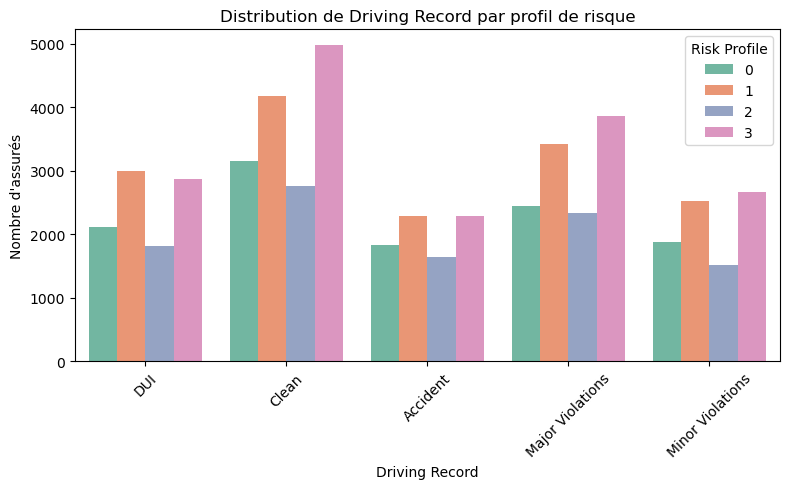

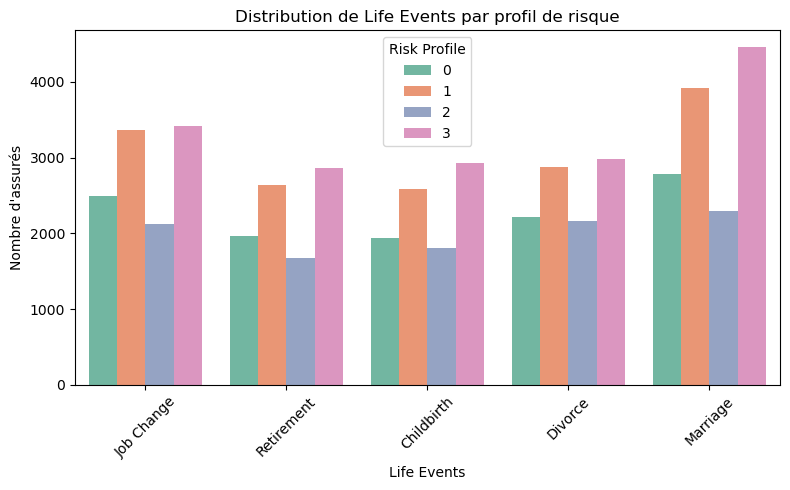

In [48]:
# Barplots : Variables catégorielles vs Risk Profile
cat_vars = df_cleaned.select_dtypes(include='object')

#cat_vars = ['Marital Status', 'Gender', 'Education Level', 'Occupation', 'Interactions with Customer Service', 'Customer Preferences' 'Driving Record']

for var in cat_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='Risk Profile', data=df_cleaned, palette='Set2')
    plt.title(f'Distribution de {var} par profil de risque')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel("Nombre d'assurés")
    plt.legend(title='Risk Profile')
    plt.tight_layout()
    plt.show()

### Matrice de corrélation des variables numériques

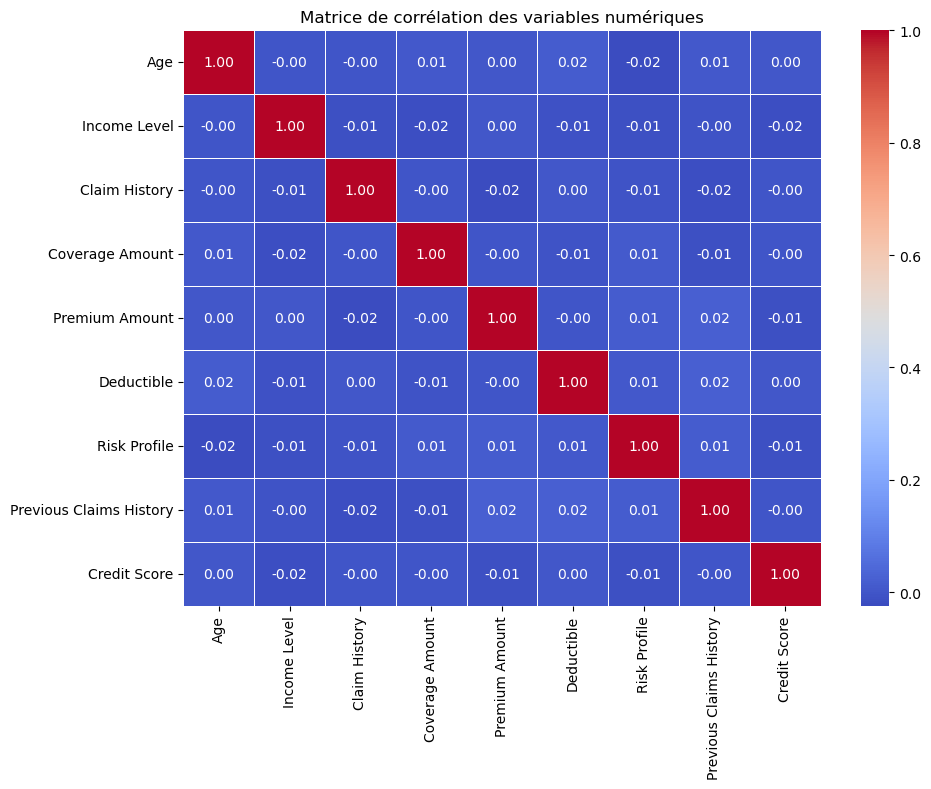

In [49]:
# 🔍 Sélection des colonnes numériques
num_cols = df_cleaned.select_dtypes(include='number')

# 🔷 Calcul de la matrice de corrélation
corr_matrix = num_cols.corr()

# 🔷 Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

### MODELISATION

* Préparation des données

In [50]:
# Cible
target = 'Risk Profile'
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

# Variables numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

* Pipeline de prétraitement

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
# Encodage + standardisation
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


* Train/test de séparation

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

* Modèles à tester

In [54]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

* Entraînement et évaluation

In [55]:
for name, model in models.items():
    print(f"\n🔍 Modèle : {name}")

    # Pipeline complet
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Matrice de confusion:")
    print(confusion_matrix(y_test, y_pred))


🔍 Modèle : Logistic Regression


c:\Users\mdied\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.03      0.05      2281
           1       0.32      0.41      0.36      3079
           2       0.25      0.01      0.02      2012
           3       0.35      0.67      0.46      3329

    accuracy                           0.33     10701
   macro avg       0.29      0.28      0.22     10701
weighted avg       0.30      0.33      0.26     10701

Matrice de confusion:
[[  61  864   27 1329]
 [  74 1267   24 1714]
 [  56  767   23 1166]
 [  59 1024   19 2227]]

🔍 Modèle : Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.23      0.22      2281
           1       0.29      0.29      0.29      3079
           2       0.20      0.19      0.19      2012
           3       0.32      0.32      0.32      3329

    accuracy                           0.27     10701
   macro avg       0.26      0.26      0.26     1070

c:\Users\mdied\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.12      0.16      2281
           1       0.33      0.40      0.36      3079
           2       0.24      0.10      0.14      2012
           3       0.34      0.53      0.42      3329

    accuracy                           0.32     10701
   macro avg       0.29      0.29      0.27     10701
weighted avg       0.30      0.32      0.29     10701

Matrice de confusion:
[[ 274  766  183 1058]
 [ 323 1230  201 1325]
 [ 195  676  193  948]
 [ 317 1032  232 1748]]


In [56]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
y_pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_pred_prob, average="macro", multi_class="ovr")
print(f"ROC AUC (macro, ovr): {auc_score:.3f}")

ROC AUC (macro, ovr): 0.546


| Modèle                 | Accuracy | Meilleure Recall    | Observations principales                                      |
| ---------------------- | -------- | ------------------- | ------------------------------------------------------------- |
| **LogisticRegression** | 0.33     | Classe 3 (0.67)     | Fort déséquilibre, sur-apprentissage de la classe majoritaire |
| **Decision Tree**      | 0.27     | Classe 1 à 3 (≈0.3) | Répartition plus équitable, mais faible discrimination        |
| **Random Forest**      | 0.32     | Classe 3 (0.55)     | Comportement proche du log. reg., mais faible généralisation  |
| **XGBoost**            | 0.32     | Classe 3 (0.53)     | Légère amélioration du F1-score par rapport aux autres  

Interprétation

- Classe 3 est la plus prédite par tous les modèles → classe majoritaire dans les prédictions .

* Classe 2 est systématiquement mal prédite → faible recallet precision, donc probablement sous-représentée ou mal différenciée.

* Les modèles peinent à séparer les classes , ce qui peut indiquer :

     * une faible séparabilité dans les caractéristiques actuelles ;

     * un besoin de feature Engineering ou de sélection ;

     * un déséquilibre des classes

### AMÉLIORATION

* Commençons par le Feature Engineering simple

   Objectif : donner plus de pouvoir prédictif au modèle.

   Ajout de ces 3 nouvelles variables :

c:\Users\mdied\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:33:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 800x600 with 0 Axes>

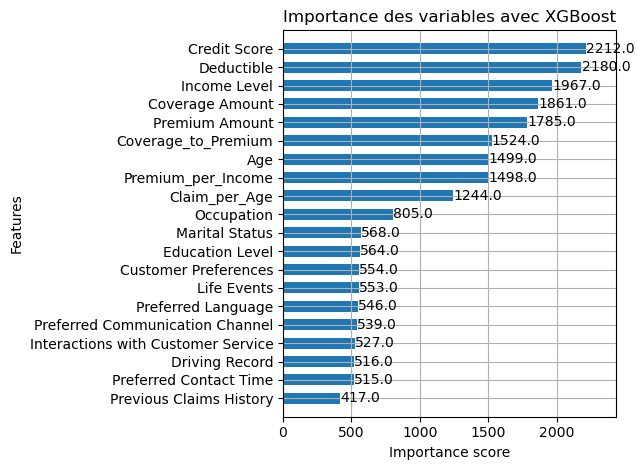

In [57]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Créer les variables dérivées
df_cleaned['Claim_per_Age'] = df_cleaned['Claim History'] / df_cleaned['Age']
df_cleaned['Premium_per_Income'] = df_cleaned['Premium Amount'] / df_cleaned['Income Level']
df_cleaned['Coverage_to_Premium'] = df_cleaned['Coverage Amount'] / df_cleaned['Premium Amount']

# Vérifie qu'il n'y a pas d'inf ou NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned.dropna(inplace=True)

# --- Préparer les données ---
X = df_cleaned.drop(['Risk Profile'], axis=1)
y = df_cleaned['Risk Profile']

# Encoder les variables catégorielles
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split en train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Entraîner un XGBoost simple ---
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# --- Visualiser l’importance des variables ---
plt.figure(figsize=(8, 6))
xgb.plot_importance(model, max_num_features=20, height=0.6)
plt.title("Importance des variables avec XGBoost")
plt.tight_layout()
plt.show()

* Filtrage des variables peu informatives


In [58]:
# Liste manuelle des colonnes à exclure selon importance < 500
cols_to_remove = [
    'Previous Claims History', 'Preferred Contact Time', 'Driving Record',
    'Interactions with Customer Service', 'Preferred Communication Channel'
]

# Données filtrées
X_filtered = X.drop(columns=cols_to_remove)

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Split
X_train_f, X_test_f, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, stratify=y, random_state=42)

# Entraînement
xgb_filtered = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_filtered.fit(X_train_f, y_train)

# Prédictions
y_pred = xgb_filtered.predict(X_test_f)

# Évaluation
print("🔍 Classification Report :")
print(classification_report(y_test, y_pred))

print("\n🧩 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Pour calculer l’AUC macro avec output probabiliste :
y_proba = xgb_filtered.predict_proba(X_test_f)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print(f"\n🎯 ROC AUC (macro, ovr) : {roc_auc:.3f}")

c:\Users\mdied\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:34:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Classification Report :
              precision    recall  f1-score   support

           0       0.25      0.12      0.16      2281
           1       0.31      0.38      0.35      3079
           2       0.23      0.08      0.12      2012
           3       0.34      0.52      0.41      3329

    accuracy                           0.31     10701
   macro avg       0.28      0.28      0.26     10701
weighted avg       0.29      0.31      0.28     10701


🧩 Matrice de confusion :
[[ 276  824  156 1025]
 [ 335 1178  198 1368]
 [ 173  670  171  998]
 [ 305 1077  232 1715]]

🎯 ROC AUC (macro, ovr) : 0.539


=> Classe 3 : toujours sur-prédite → le modèle a du mal à distinguer les classes

Testons ces méthodes :

* Appliquer SMOTE (avec code complet)

* Faire une réduction à 10 fonctionnalités max

* Lancer un tuning XGBoost

* Tester un autre modèle (LightGBM ou CatBoost) ?

In [36]:
pip install imbalanced-learn xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# 🎯 Variable cible
y = df_cleaned["Risk Profile"]

# 🧠 Encodage des variables catégorielles
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 🔟 Sélection des 10 variables importantes (issues de XGBoost)
top_features = ['Credit Score', 'Deductible', 'Income Level', 'Coverage Amount', 'Premium Amount',
                'Coverage_to_Premium', 'Age', 'Premium_per_Income', 'Claim_per_Age', 'Occupation']
X = X[top_features]

# 🔁 Application de SMOTE pour équilibrer les classes
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# 📊 Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🔧 Tuning du modèle XGBoost
xgb = XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', random_state=42)
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
search = RandomizedSearchCV(xgb, params, n_iter=5, cv=3, scoring='f1_macro', random_state=42)
search.fit(X_train, y_train)

xgb_best = search.best_estimator_
xgb_preds = xgb_best.predict(X_test)
print("🔍 XGBoost")
print(classification_report(y_test, xgb_preds))
print("Matrice de confusion :\n", confusion_matrix(y_test, xgb_preds))
print("ROC AUC :", roc_auc_score(y_test, xgb_best.predict_proba(X_test), multi_class='ovr'))

# 🔍 Test LightGBM
lgbm = LGBMClassifier(objective='multiclass', num_class=4, random_state=42)
lgbm.fit(X_train, y_train)
print("\n🔍 LightGBM")
print(classification_report(y_test, lgbm.predict(X_test)))
print("ROC AUC :", roc_auc_score(y_test, lgbm.predict_proba(X_test), multi_class='ovr'))

# 🔍 Test CatBoost
cat = CatBoostClassifier(loss_function='MultiClass', verbose=0, random_state=42)
cat.fit(X_train, y_train)
print("\n🔍 CatBoost")
print(classification_report(y_test, cat.predict(X_test)))
print("ROC AUC :", roc_auc_score(y_test, cat.predict_proba(X_test), multi_class='ovr'))


🔍 XGBoost
              precision    recall  f1-score   support

           0       0.36      0.34      0.35      3287
           1       0.31      0.29      0.30      3359
           2       0.39      0.41      0.40      3316
           3       0.31      0.32      0.32      3356

    accuracy                           0.34     13318
   macro avg       0.34      0.34      0.34     13318
weighted avg       0.34      0.34      0.34     13318

Matrice de confusion :
 [[1108  674  741  764]
 [ 704  987  717  951]
 [ 644  575 1370  727]
 [ 658  909  702 1087]]
ROC AUC : 0.6069452097257348
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 53270, number of used features: 10
[LightGBM] [Info] Start training from sc

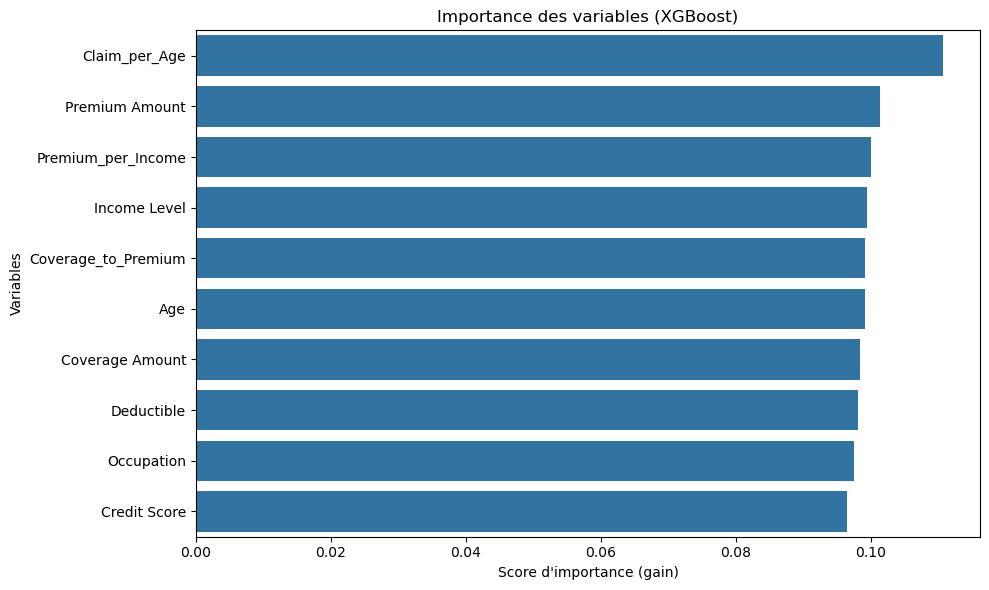


🎯 Top 10 variables les plus importantes selon XGBoost :
              Variable  Importance
8        Claim_per_Age    0.110607
4       Premium Amount    0.101377
7   Premium_per_Income    0.100049
2         Income Level    0.099442
5  Coverage_to_Premium    0.099146
6                  Age    0.099135
3      Coverage Amount    0.098352
1           Deductible    0.098005
9           Occupation    0.097474
0         Credit Score    0.096413


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Récupération des importances depuis le meilleur modèle XGBoost
importances = xgb_best.feature_importances_
features = X.columns

# Création d’un DataFrame trié par importance décroissante
feat_imp_df = pd.DataFrame({
    'Variable': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 🖼️ Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=feat_imp_df)
plt.title("Importance des variables (XGBoost)")
plt.xlabel("Score d'importance (gain)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# 🖨️ Affichage tabulaire
print("\n🎯 Top 10 variables les plus importantes selon XGBoost :")
print(feat_imp_df.head(10))


# APP

In [65]:
import joblib

# 🔁 Liste des features utilisées
feature_names = X.columns.tolist()

# 📦 Sauvegarde du modèle + des noms des variables
joblib.dump((xgb_best, feature_names), "../app/xgb_risk_model.pkl")


['../app/xgb_risk_model.pkl']

In [64]:
import joblib

# Sauvegarde du meilleur modèle entraîné
joblib.dump(xgb_best, "../app/xgb_risk_model.pkl")  # Attention au chemin selon ta structure


['../app/xgb_risk_model.pkl']